# Tips de Visualización con Matplotlib

Este notebook trata de algunos tips de visualización utilizando librerías de Python

Primero importamos las librerías necesarias

In [275]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## FIFA

Este primer dataset nos muestra porcentajes de población, audiencia y PIB mundial por países y regiones de la FIFA. 

In [4]:
fifa = pd.read_csv('fifa_countries_audience.csv', sep=',')
fifa.head()

country confederation  population_share  tv_audience_share  \
0  United States      CONCACAF               4.5                4.3   
1          Japan           AFC               1.9                4.9   
2          China           AFC              19.5               14.8   
3        Germany          UEFA               1.2                2.9   
4         Brazil      CONMEBOL               2.8                7.1   

   gdp_weighted_share  
0                11.3  
1                 9.1  
2                 7.3  
3                 6.3  
4                 5.4

### Exploración de la base de datos

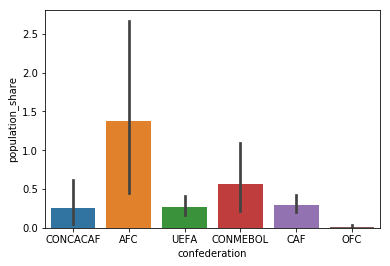

In [287]:
sns.barplot(data = fifa, x = "confederation", y = "population_share");

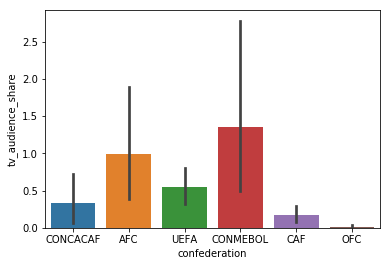

In [289]:
sns.barplot(data = fifa, x = "confederation", y = "tv_audience_share");

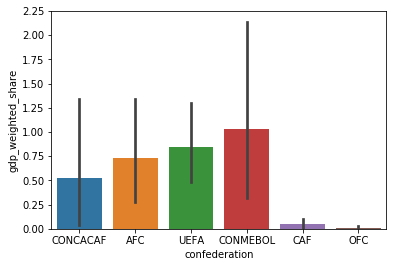

In [291]:
sns.barplot(data = fifa, x = "confederation", y = "gdp_weighted_share");

### Análisis por Regiones

Lo primero que podemos hacer es un group by para ver qué regiones de la FIFA son más importantes 

In [6]:
conf = fifa.groupby('confederation').sum()
conf

population_share  tv_audience_share  gdp_weighted_share
confederation                                                         
AFC                        58.9               42.6                31.6
CAF                        14.9                8.6                 2.6
CONCACAF                    7.8                9.8                15.8
CONMEBOL                    5.6               13.5                10.3
OFC                         0.2                0.2                 0.1
UEFA                       12.4               25.2                39.0

Es interesante que la gran mayoría de la población se concentra en Asia, podemos hacer una visualización para mostrar este insight que encontramos

Primero, para poder graficar el índice devemos convertirlo en una columna del dataframe

In [9]:
conf = conf.reset_index()

Y para que sea fácil de comparar podemos ordenarlo por la columna de población

In [13]:
conf.sort_values(by='population_share',ascending=False, inplace=True)

In [16]:
conf.head()

confederation  population_share  tv_audience_share  gdp_weighted_share
0           AFC              58.9               42.6                31.6
1           CAF              14.9                8.6                 2.6
5          UEFA              12.4               25.2                39.0
2      CONCACAF               7.8                9.8                15.8
3      CONMEBOL               5.6               13.5                10.3

Ahora si podemos graficar:

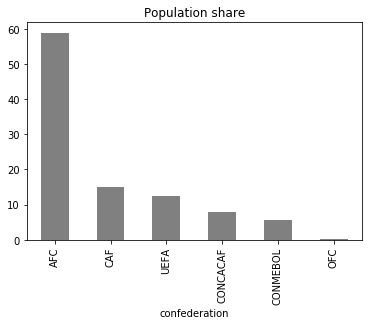

In [30]:
conf.plot(x='confederation',y='population_share',kind='bar',color='gray',title='Population share', legend=False);

Hacemos un reset del index para preservar el orden por población en la siguiente gráfica

In [70]:
conf.reset_index(inplace=True)
conf

index confederation  population_share  tv_audience_share  \
0      0           AFC              58.9               42.6   
1      1           CAF              14.9                8.6   
2      5          UEFA              12.4               25.2   
3      2      CONCACAF               7.8                9.8   
4      3      CONMEBOL               5.6               13.5   
5      4           OFC               0.2                0.2   

   gdp_weighted_share  
0                31.6  
1                 2.6  
2                39.0  
3                15.8  
4                10.3  
5                 0.1

En la siguiente gráfica dividimos el análisis en cuatro cuadrantes donde el superior derecho indica cuáles regiones serían más importantes para la FIFA en términos de audiencia y poder adquisitivo

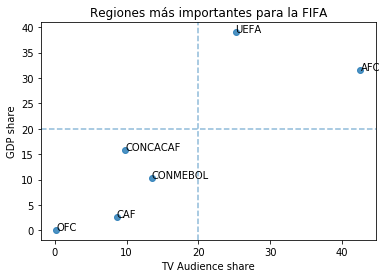

In [276]:
fig, ax = plt.subplots()
ax.scatter(conf['tv_audience_share'],conf['gdp_weighted_share'],alpha=0.8);

for i, label in enumerate(conf['confederation']):
    ax.annotate(label,(conf['tv_audience_share'][i],conf['gdp_weighted_share'][i]));

plt.axhline(20, alpha=0.5,ls='dashed')
plt.axvline(20, alpha=0.5,ls='dashed')

plt.title('Regiones más importantes para la FIFA');
plt.xlabel('TV Audience share')
plt.ylabel('GDP share');

### Exploración distribución de países por región

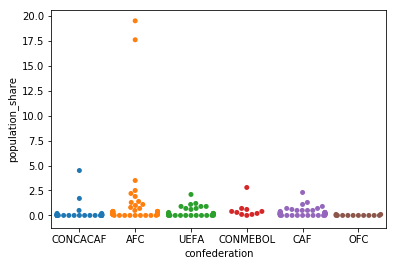

In [293]:
sns.swarmplot(data = fifa, x = "confederation", y = "population_share");

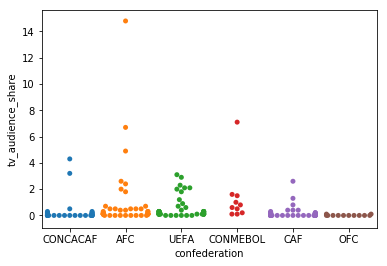

In [295]:
sns.swarmplot(data = fifa, x = "confederation", y = "tv_audience_share");

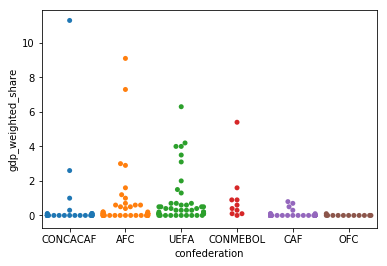

In [297]:
sns.swarmplot(data = fifa, x = "confederation", y = "gdp_weighted_share");

### Análisis por país

In [82]:
fifa_top10 = fifa.sort_values(by='tv_audience_share',ascending=False).head(10)
fifa_top10

country confederation  population_share  tv_audience_share  \
2           China           AFC              19.5               14.8   
4          Brazil      CONMEBOL               2.8                7.1   
11      Indonesia           AFC               3.5                6.7   
1           Japan           AFC               1.9                4.9   
0   United States      CONCACAF               4.5                4.3   
12         Mexico      CONCACAF               1.7                3.2   
8          Russia          UEFA               2.1                3.1   
3         Germany          UEFA               1.2                2.9   
26        Nigeria           CAF               2.3                2.6   
29        Vietnam           AFC               1.3                2.6   

    gdp_weighted_share  
2                  7.3  
4                  5.4  
11                 2.9  
1                  9.1  
0                 11.3  
12                 2.6  
8                  3.5  
3                  6.3  
26                 0.7  
29                 0.6

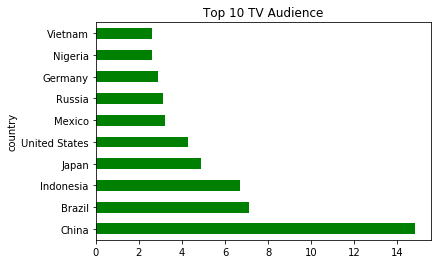

In [84]:
fifa_top10.plot(x='country',y='tv_audience_share',kind='barh',color='green',title='Top 10 TV Audience', legend=False);

In [269]:
fifa_top10.reset_index(inplace=True)

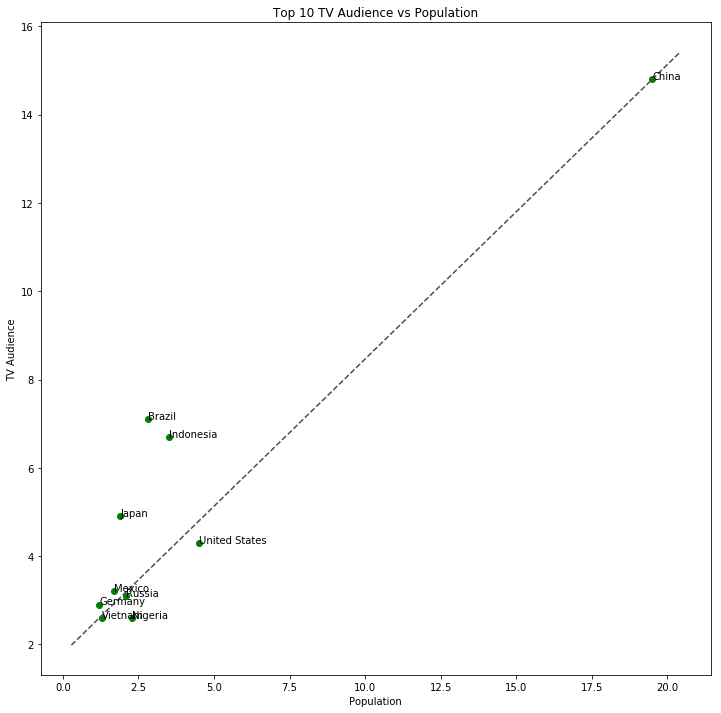

In [273]:
f, ax = plt.subplots(figsize=(12, 12));
ax.scatter(fifa_top10['population_share'],fifa_top10['tv_audience_share'],color='green');
ax.plot(ax.get_xlim(), ax.get_ylim(), ls="--", c=".3");
plt.title('Top 10 TV Audience vs Population')
plt.ylabel('TV Audience')
plt.xlabel('Population')

for i, label in enumerate(fifa_top10['country']):
    ax.annotate(label,(fifa_top10['population_share'][i],fifa_top10['tv_audience_share'][i]));

Podemos jugar con xlim y ylim para hacer zoom a nuestra gráfica

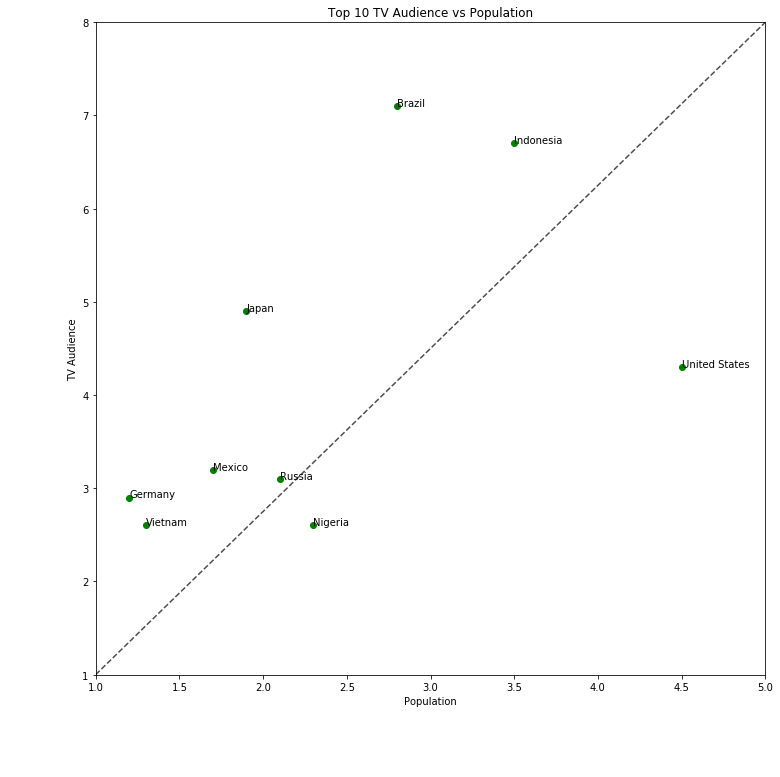

In [300]:
f, ax = plt.subplots(figsize=(12, 12));

plt.xlim(1,5)
plt.ylim(1,8)

ax.scatter(fifa_top10['population_share'],fifa_top10['tv_audience_share'],color='green');
ax.plot(ax.get_xlim(), ax.get_ylim(), ls="--", c=".3");
plt.title('Top 10 TV Audience vs Population')
plt.ylabel('TV Audience')
plt.xlabel('Population')

for i, label in enumerate(fifa_top10['country']):
    ax.annotate(label,(fifa_top10['population_share'][i],fifa_top10['tv_audience_share'][i]));

## PIB de México

Primero importamos nuestra base de datos con el encoding correcto

In [105]:
pib = pd.read_csv('PIB_Mexico_Precios2013.csv',sep=',',encoding='latin')
pib.head()

Periodo        0_PIB  1_Primarias  11_Agricultura_Pesca_Caza  \
0  1993/01  10008894.66   356222.154                 356222.154   
1  1993/02  10171035.40   364092.188                 364092.188   
2  1993/03  10066258.41   352560.802                 352560.802   
3  1993/04  10416096.24   406012.520                 406012.520   
4  1994/01  10343388.47   349532.754                 349532.754   

   111_Agricultura  112_Cria_Explotacion_Animales  \
0       216828.345                     111882.861   
1       209610.852                     126136.326   
2       179794.431                     146415.543   
3       245271.568                     133374.962   
4       212306.946                     110838.502   

   113_Aprovechamiento_forestal  114_Pesca,_caza_y_captura  \
0                     17803.113                   9059.271   
1                     17044.255                  10802.530   
2                     16857.712                   8910.942   
3                     16537.041                  10098.857   
4                     16421.246                   9076.500   

   115_Servicios_relacionados_con_las_actividades_agropecuarias_y_forestales  \
0                                            648.564                           
1                                            498.226                           
2                                            582.174                           
3                                            730.092                           
4                                            889.561                           

   2_Secundarias  \
0    3657173.107   
1    3592667.574   
2    3680608.232   
3    3805311.831   
4    3814213.291   

                                                                ...                                                                \
0                                                               ...                                                                 
1                                                               ...                                                                 
2                                                               ...                                                                 
3                                                               ...                                                                 
4                                                               ...                                                                 

   711_Servicios_artÕsticos,_culturales_y_deportivos,_y_otros_servicios_relacionados_  \
0                                          20840.024                                    
1                                          18607.798                                    
2                                          17536.727                                    
3                                          19573.871                                    
4                                          21938.608                                    

   712-713_Museos,_sitios_histÑricos,_zoolÑgicos_y_similares;_Servicios_de_entretenimiento_en_instalaciones_recreativas_y_otros_servicios_recreativos_  \
0                                          47305.607                                                                                                     
1                                          46291.677                                                                                                     
2                                          43865.939                                                                                                     
3                                          42399.177                                                                                                     
4                                          50283.218                                                                                                     

   72_Servicios_de_alojamiento_temporal_y_de_pr

Arreglamos el index y la columna periodo a tipo Datetime

In [106]:
pib['Periodo'] = pd.to_datetime(pib['Periodo'])

In [107]:
pib['Index'] = pib['Periodo']

In [108]:
pib.set_index('Index', inplace= True)

In [109]:
pib.head()

Periodo        0_PIB  1_Primarias  11_Agricultura_Pesca_Caza  \
Index                                                                        
1993-01-01 1993-01-01  10008894.66   356222.154                 356222.154   
1993-02-01 1993-02-01  10171035.40   364092.188                 364092.188   
1993-03-01 1993-03-01  10066258.41   352560.802                 352560.802   
1993-04-01 1993-04-01  10416096.24   406012.520                 406012.520   
1994-01-01 1994-01-01  10343388.47   349532.754                 349532.754   

            111_Agricultura  112_Cria_Explotacion_Animales  \
Index                                                        
1993-01-01       216828.345                     111882.861   
1993-02-01       209610.852                     126136.326   
1993-03-01       179794.431                     146415.543   
1993-04-01       245271.568                     133374.962   
1994-01-01       212306.946                     110838.502   

            113_Aprovechamiento_forestal  114_Pesca,_caza_y_captura  \
Index                                                                 
1993-01-01                     17803.113                   9059.271   
1993-02-01                     17044.255                  10802.530   
1993-03-01                     16857.712                   8910.942   
1993-04-01                     16537.041                  10098.857   
1994-01-01                     16421.246                   9076.500   

            115_Servicios_relacionados_con_las_actividades_agropecuarias_y_forestales  \
Index                                                                                   
1993-01-01                                            648.564                           
1993-02-01                                            498.226                           
1993-03-01                                            582.174                           
1993-04-01                                            730.092                           
1994-01-01                                            889.561                           

            2_Secundarias  \
Index                       
1993-01-01    3657173.107   
1993-02-01    3592667.574   
1993-03-01    3680608.232   
1993-04-01    3805311.831   
1994-01-01    3814213.291   

                                                                         ...                                                                \
Index                                                                    ...                                                                 
1993-01-01                                                               ...                                                                 
1993-02-01                                                               ...                                                                 
1993-03-01                                                               ...                                                                 
1993-04-01                                                               ...                                                                 
1994-01-01                                                               ...                                                                 

            711_Servicios_artÕsticos,_culturales_y_deportivos,_y_otros_servicios_relacionados_  \
Index                                                                                            
1993-01-01                                          20840.024                                    
1993-02-01                                          18607.798                                    
1993-03-01                                          17536.727                                    
1993-04-01                                          19573.871                                    
1994-01-01                                          21938.608                                    

            712-713_Muse

Ahora podemos graficar el PIB de México

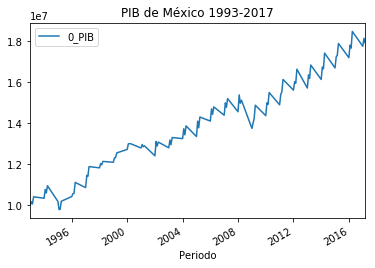

In [277]:
pib.plot(x='Periodo',y='0_PIB',title='PIB de México 1993-2017');

### Indizar la serie

Un tratamiento común a una base de datos es poder hacer índices a partir de valores concretos. Esto se consigue dividiendo los valores de la serie entre un valor base. En este caso dividiremos los valores de acuerdo al PIB promedio de 2013

In [279]:
pib['2013']

Periodo        0_PIB  1_Primarias  11_Agricultura_Pesca_Caza  \
Index                                                                        
2013-01-01 2013-01-01  15719443.11   459064.235                 459064.235   
2013-02-01 2013-02-01  16361495.54   543467.633                 543467.633   
2013-03-01 2013-03-01  16185973.62   427914.306                 427914.306   
2013-04-01 2013-04-01  16841836.04   613176.602                 613176.602   

            111_Agricultura  112_Cria_Explotacion_Animales  \
Index                                                        
2013-01-01       274351.551                     157946.208   
2013-02-01       348950.260                     163816.011   
2013-03-01       228872.148                     170148.149   
2013-04-01       402149.573                     175040.328   

            113_Aprovechamiento_forestal  114_Pesca,_caza_y_captura  \
Index                                                                 
2013-01-01                     16377.313                   8831.252   
2013-02-01                     18629.271                  10751.477   
2013-03-01                     16150.352                  11522.344   
2013-04-01                     18713.397                  14619.947   

            115_Servicios_relacionados_con_las_actividades_agropecuarias_y_forestales  \
Index                                                                                   
2013-01-01                                           1557.911                           
2013-02-01                                           1320.615                           
2013-03-01                                           1221.313                           
2013-04-01                                           2653.357                           

            2_Secundarias        ...          \
Index                            ...           
2013-01-01    5067399.578        ...           
2013-02-01    5201112.797        ...           
2013-03-01    5199256.343        ...           
2013-04-01    5273480.906        ...           

            721_Servicios_de_alojamiento_temporal_  \
Index                                                
2013-01-01                              164088.514   
2013-02-01                              158557.266   
2013-03-01                              165349.651   
2013-04-01                              158991.825   

            722_Servicios_de_preparaciÑn_de_alimentos_y_bebidas_  \
Index                                                              
2013-01-01                                         181853.350      
2013-02-01                                         186230.837      
2013-03-01                                         183115.777      
2013-04-01                                         180896.107      

            81_Otros_servicios_excepto_actividades_gubernamentales  \
Index                                                                
2013-01-01                                         334264.650        
2013-02-01                                         340387.264        
2013-03-01                                         343552.590        
2013-04-01                                         342135.852        

            811_Servicios_de_reparaciÑn_y_mantenimiento_  \
Index                                                      
2013-01-01                                     75436.492   
2013-02-01                                     77877.751   
2013-03-01                                     80113.007   
2013-04-01                                     80244.198   

            812_Servicios_personales_  \
Index                                   
2013-01-01                 137081.914   
2013-02-01                 141398.616   
2013-03-01                 143170.743   
2013-04-01                 143147.190   

            813-814_Asociaciones_y_organizaciones;_Hogares_con_empleados_dom_sticos_  \
Index                                                                 

In [280]:
pib_2013_avg = pib['2013'].mean()
pib_2013_avg

0_PIB                                                                                                                                                  1.627719e+07
1_Primarias                                                                                                                                            5.109057e+05
11_Agricultura_Pesca_Caza                                                                                                                              5.109057e+05
111_Agricultura                                                                                                                                        3.135809e+05
112_Cria_Explotacion_Animales                                                                                                                          1.667377e+05
113_Aprovechamiento_forestal                                                                                                                           1.746758e+04
114_Pesca,_caza_

Ahora seleccionamos todas las columnas a excepción de periodo para indizarlas

In [118]:
pib.loc[:, pib.columns != 'Periodo'].head()

0_PIB  1_Primarias  11_Agricultura_Pesca_Caza  \
Index                                                             
1993-01-01  10008894.66   356222.154                 356222.154   
1993-02-01  10171035.40   364092.188                 364092.188   
1993-03-01  10066258.41   352560.802                 352560.802   
1993-04-01  10416096.24   406012.520                 406012.520   
1994-01-01  10343388.47   349532.754                 349532.754   

            111_Agricultura  112_Cria_Explotacion_Animales  \
Index                                                        
1993-01-01       216828.345                     111882.861   
1993-02-01       209610.852                     126136.326   
1993-03-01       179794.431                     146415.543   
1993-04-01       245271.568                     133374.962   
1994-01-01       212306.946                     110838.502   

            113_Aprovechamiento_forestal  114_Pesca,_caza_y_captura  \
Index                                                                 
1993-01-01                     17803.113                   9059.271   
1993-02-01                     17044.255                  10802.530   
1993-03-01                     16857.712                   8910.942   
1993-04-01                     16537.041                  10098.857   
1994-01-01                     16421.246                   9076.500   

            115_Servicios_relacionados_con_las_actividades_agropecuarias_y_forestales  \
Index                                                                                   
1993-01-01                                            648.564                           
1993-02-01                                            498.226                           
1993-03-01                                            582.174                           
1993-04-01                                            730.092                           
1994-01-01                                            889.561                           

            2_Secundarias   21_MinerÕa  \
Index                                    
1993-01-01    3657173.107   970841.200   
1993-02-01    3592667.574   997049.909   
1993-03-01    3680608.232  1004459.239   
1993-04-01    3805311.831  1033707.343   
1994-01-01    3814213.291  1002565.241   

                                                                         ...                                                                \
Index                                                                    ...                                                                 
1993-01-01                                                               ...                                                                 
1993-02-01                                                               ...                                                                 
1993-03-01                                                               ...                                                                 
1993-04-01                                                               ...                                                                 
1994-01-01                                                               ...                                                                 

            711_Servicios_artÕsticos,_culturales_y_deportivos,_y_otros_servicios_relacionados_  \
Index                                                                                            
1993-01-01                                          20840.024                                    
1993-02-01                                          18607.798                                    
1993-03-01                                          17536.727                                    
1993-04-01                                          19573.871                                    
1994-01-01                                          21938.608                                    

            71

In [132]:
pib_ind = pib.loc[:, pib.columns != 'Periodo']/pib_2013_avg*100
pib_ind.head()

0_PIB  1_Primarias  11_Agricultura_Pesca_Caza  \
Index                                                           
1993-01-01  61.490321    69.723661                  69.723661   
1993-02-01  62.486444    71.264069                  71.264069   
1993-03-01  61.842740    69.007021                  69.007021   
1993-04-01  63.991992    79.469171                  79.469171   
1994-01-01  63.545307    68.414339                  68.414339   

            111_Agricultura  112_Cria_Explotacion_Animales  \
Index                                                        
1993-01-01        69.145907                      67.101129   
1993-02-01        66.844270                      75.649566   
1993-03-01        57.335903                      87.811914   
1993-04-01        78.216365                      79.990898   
1994-01-01        67.704046                      66.474780   

            113_Aprovechamiento_forestal  114_Pesca,_caza_y_captura  \
Index                                                                 
1993-01-01                    101.920871                  79.250012   
1993-02-01                     97.576492                  94.499948   
1993-03-01                     96.508554                  77.952438   
1993-04-01                     94.672748                  88.344254   
1994-01-01                     94.009834                  79.400731   

            115_Servicios_relacionados_con_las_actividades_agropecuarias_y_forestales  \
Index                                                                                   
1993-01-01                                          38.415233                           
1993-02-01                                          29.510531                           
1993-03-01                                          34.482873                           
1993-04-01                                          43.244236                           
1994-01-01                                          52.689778                           

            2_Secundarias  21_MinerÕa  \
Index                                   
1993-01-01      70.529465   84.157567   
1993-02-01      69.285460   86.429474   
1993-03-01      70.981417   87.071754   
1993-04-01      73.386356   89.607131   
1994-01-01      73.558023   86.907572   

                                                                         ...                                                                \
Index                                                                    ...                                                                 
1993-01-01                                                               ...                                                                 
1993-02-01                                                               ...                                                                 
1993-03-01                                                               ...                                                                 
1993-04-01                                                               ...                                                                 
1994-01-01                                                               ...                                                                 

            711_Servicios_artÕsticos,_culturales_y_deportivos,_y_otros_servicios_relacionados_  \
Index                                                                                            
1993-01-01                                          65.025095                                    
1993-02-01                                          58.060098                                    
1993-03-01                                          54.718139                                    
1993-04-01                                          61.074441                                    
1994-01-01                                          68.452899                                    

            712-713_Museos,_sitio

y por fin podemos reproducir nuestro gráfico ahora con forma de índice

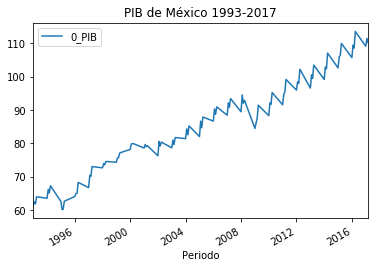

In [282]:
pib_ind.plot(x='Periodo',y='0_PIB',title='PIB de México 1993-2017');

¿Cómo interpretamos este tipo de gráficas?

### Estacionalidad y variaciones anuales

In [281]:
pib_ind['Periodo']=pib['Periodo']

Un siguiente procesamiento que podemos hacerle a la base de datos es calcular la variación anual con el fin de reducir el efecto estacional en la serie

In [148]:
pib_ind_var_anual = pib_ind.pct_change(periods=4).dropna()*100
pib_ind_var_anual.head(5)

0_PIB  1_Primarias  11_Agricultura_Pesca_Caza  111_Agricultura  \
Index                                                                           
1994-01-01  3.341966    -1.877873                  -1.877873        -2.085244   
1994-02-01  5.913762     6.690710                   6.690710        14.163874   
1994-03-01  5.329632    -7.379124                  -7.379124       -10.722437   
1994-04-01  5.152383     2.472609                   2.472609         3.301302   
1995-01-01 -1.485422    -1.074153                  -1.074153        -0.511631   

            112_Cria_Explotacion_Animales  113_Aprovechamiento_forestal  \
Index                                                                     
1994-01-01                      -0.933440                     -7.761940   
1994-02-01                      -3.699416                      0.002810   
1994-03-01                      -5.158325                      3.487164   
1994-04-01                      -1.882554                     17.201814   
1995-01-01                      -2.386123                     -4.760869   

            114_Pesca,_caza_y_captura  \
Index                                   
1994-01-01                   0.190181   
1994-02-01                  -6.933598   
1994-03-01                  -0.498780   
1994-04-01                  11.936093   
1995-01-01                   9.558123   

            115_Servicios_relacionados_con_las_actividades_agropecuarias_y_forestales  \
Index                                                                                   
1994-01-01                                          37.158553                           
1994-02-01                                          17.295565                           
1994-03-01                                          46.657013                           
1994-04-01                                          55.160719                           
1995-01-01                                         -12.286285                           

            2_Secundarias  21_MinerÕa  \
Index                                   
1994-01-01       4.294032    3.267686   
1994-02-01       7.112302    1.012648   
1994-03-01       7.141299    0.667101   
1994-04-01       3.761580   -1.969590   
1995-01-01      -5.697872   -0.904539   

                                                                         ...                                                                \
Index                                                                    ...                                                                 
1994-01-01                                                               ...                                                                 
1994-02-01                                                               ...                                                                 
1994-03-01                                                               ...                                                                 
1994-04-01                                                               ...                                                                 
1995-01-01                                                               ...                                                                 

            711_Servicios_artÕsticos,_culturales_y_deportivos,_y_otros_servicios_relacionados_  \
Index                                                                                            
1994-01-01                                           5.271510                                    
1994-02-01                                           8.591441                                    
1994-03-01                                          10.596327                                    
1994-04-01                                           7.541569                                    
1995-01-01                                          -3.641867                                    

            712-713_Museos,_sitios_hist

Comprobamos que se haya hecho bien el trabajo

In [146]:
((63.54 / 61.49) -1 )*100

3.3338754268986692

In [149]:
pib_ind_var_anual['Periodo']=pib['Periodo']

Ahora podemos ver la serie de variaciones anuales y ver qué nos dice sobre el comportamiento de la economía

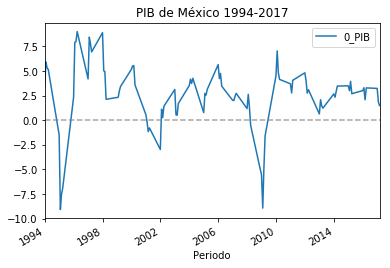

In [159]:
pib_ind_var_anual.plot(x='Periodo',y='0_PIB',title='PIB de México 1994-2017');
plt.axhline(0,ls='dashed',alpha=0.7,color='gray');

### Ciclos For y Gráficas

Uno de los usos útiles de Python es poder graficar múltiples series con la misma configuración mediante un ciclo for

Primero seleccionamos las columnas que vamos a graficar. En este caso las más de 170 que tiene nuestra base de datos

In [171]:
cols_graficar = pib_ind_var_anual.loc[:,pib_ind_var_anual.columns != 'Periodo'].columns

Revisemos algunas gráficas para tener una idea intuitiva de lo que nos dice la base de datos

/Users/jpdebotton/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


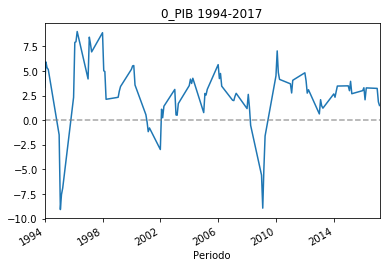

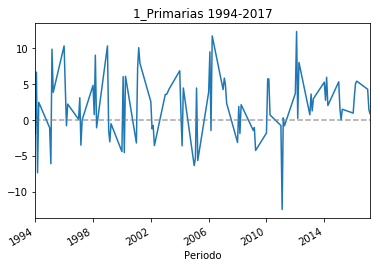

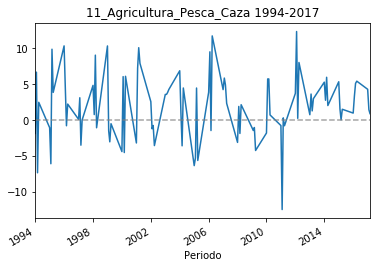

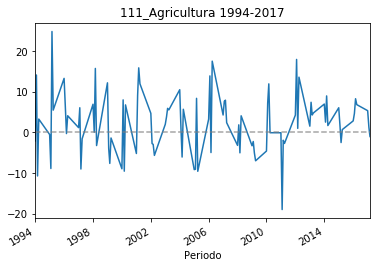

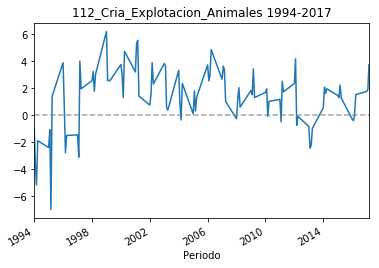

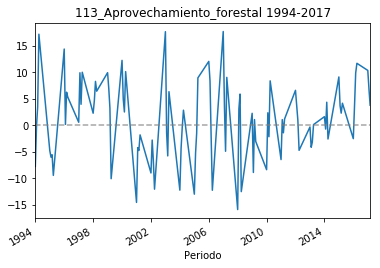

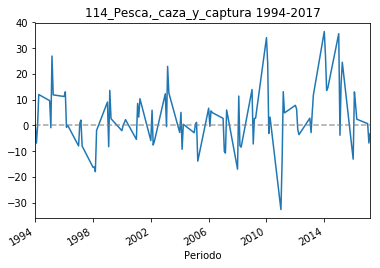

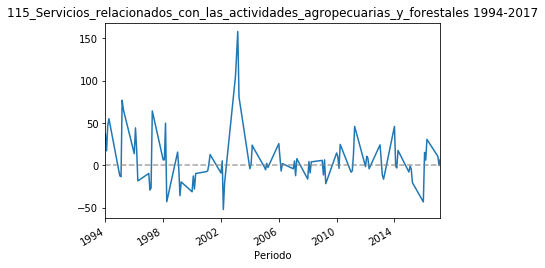

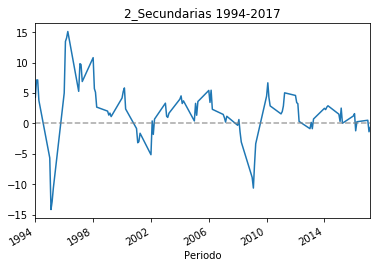

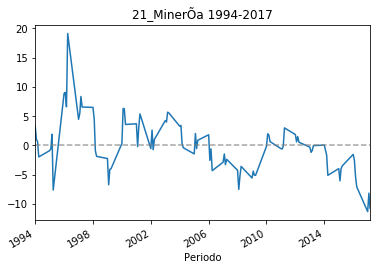

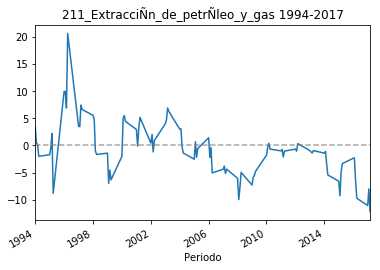

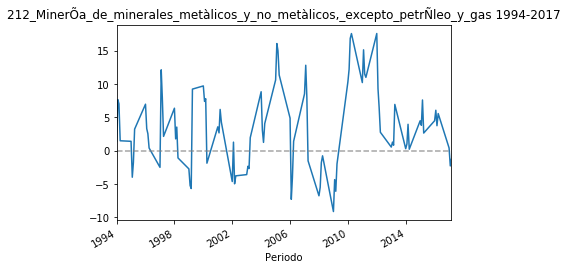

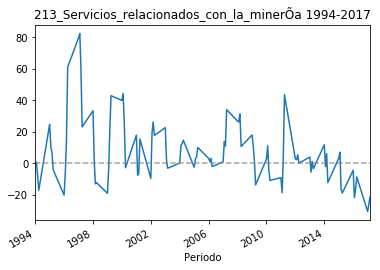

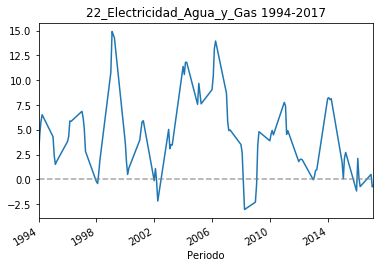

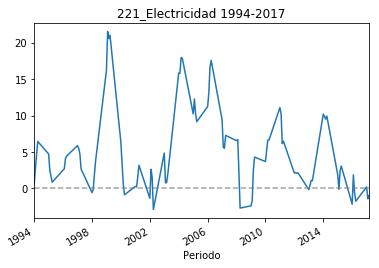

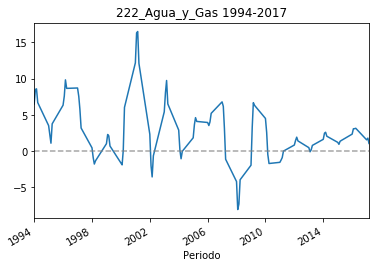

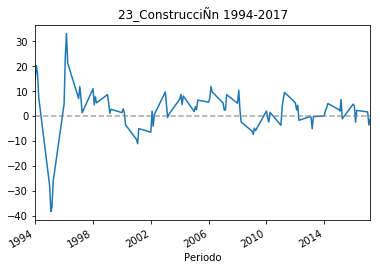

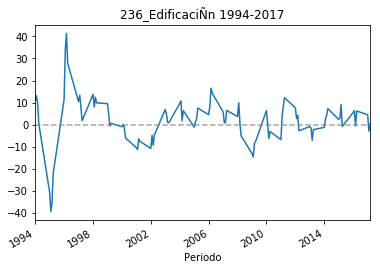

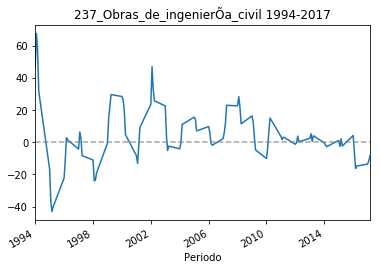

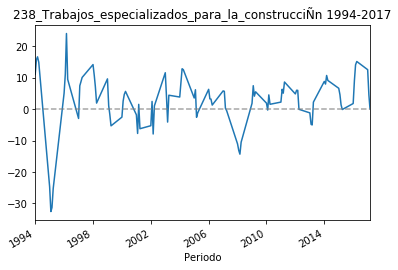

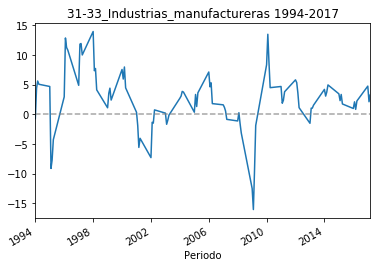

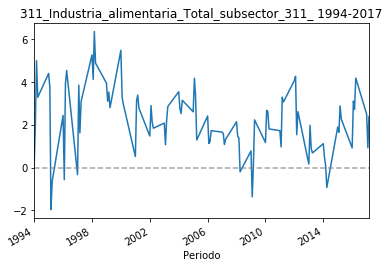

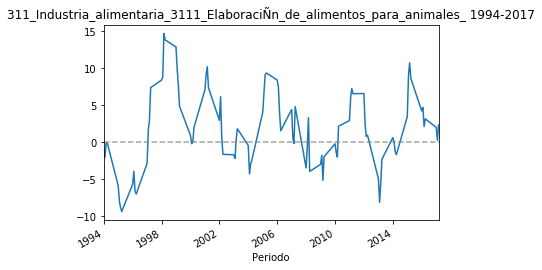

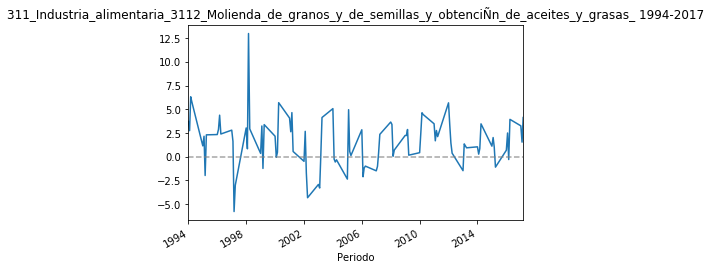

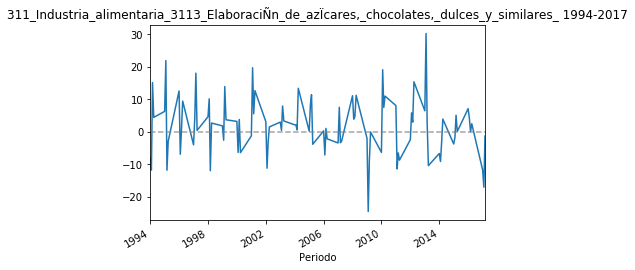

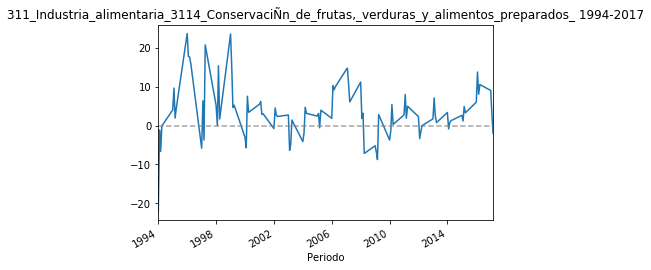

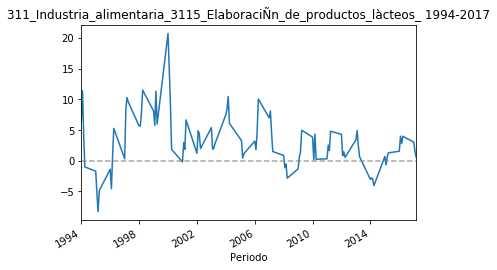

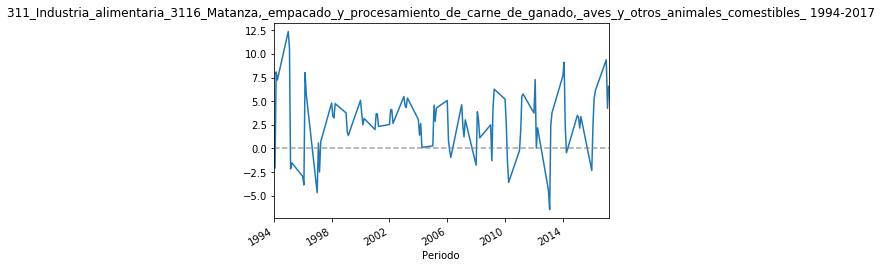

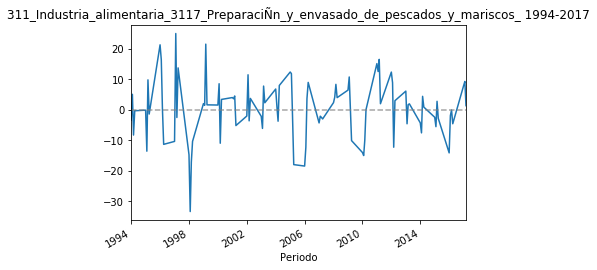

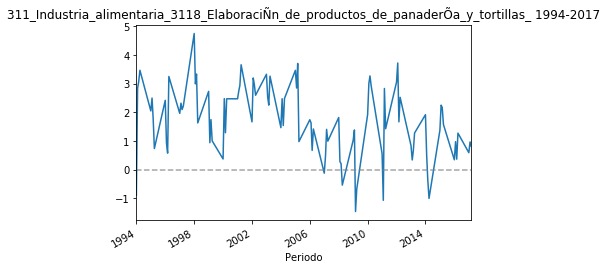

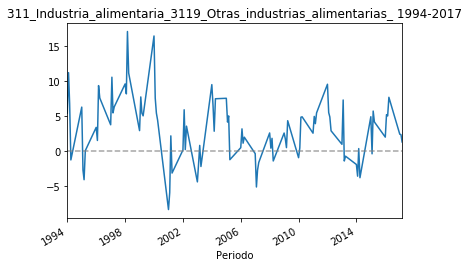

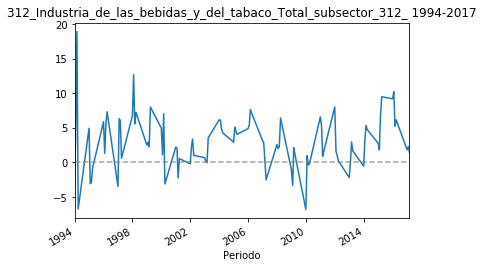

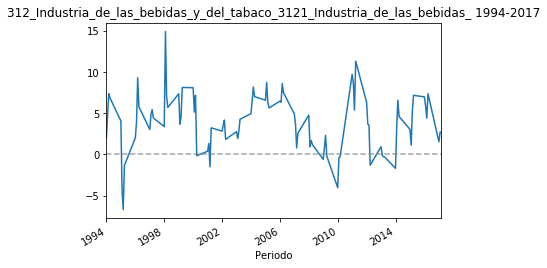

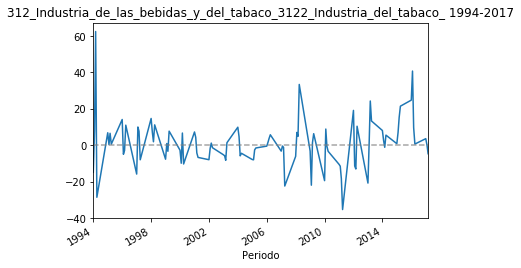

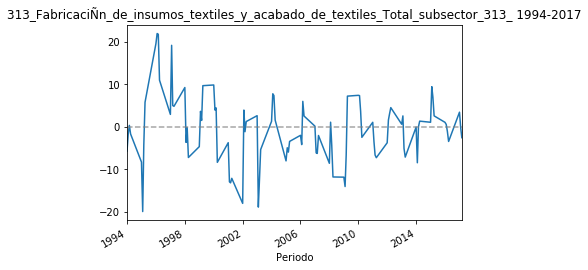

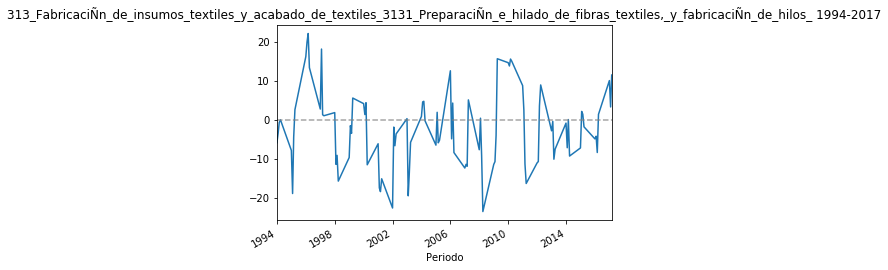

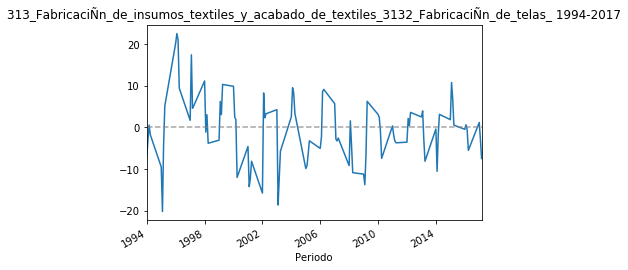

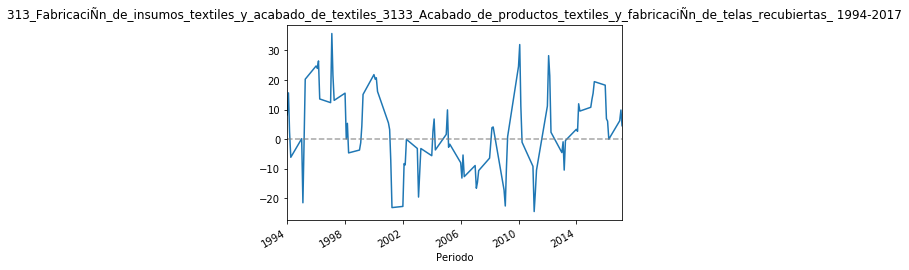

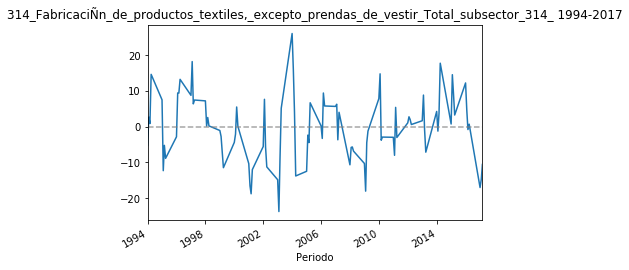

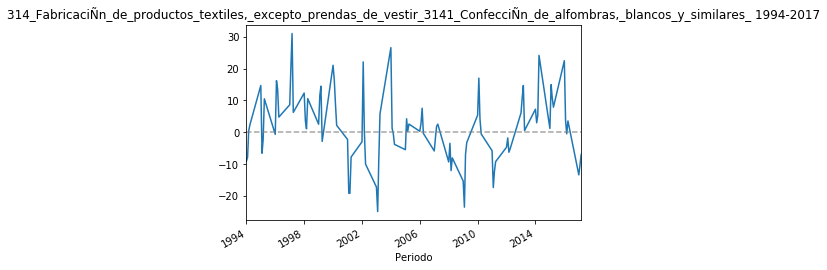

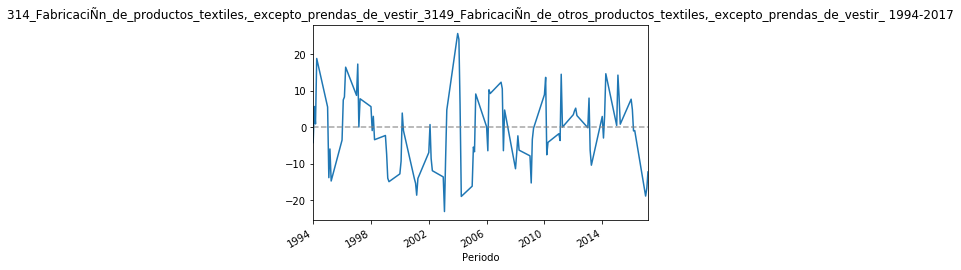

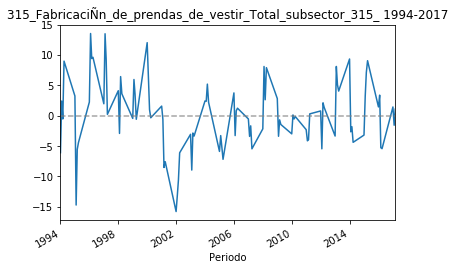

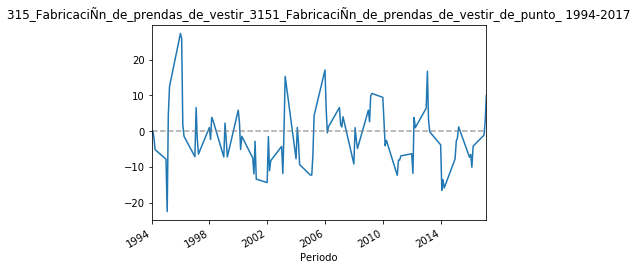

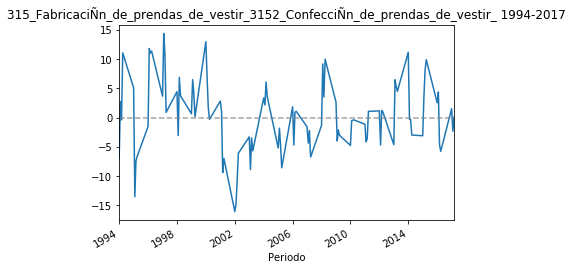

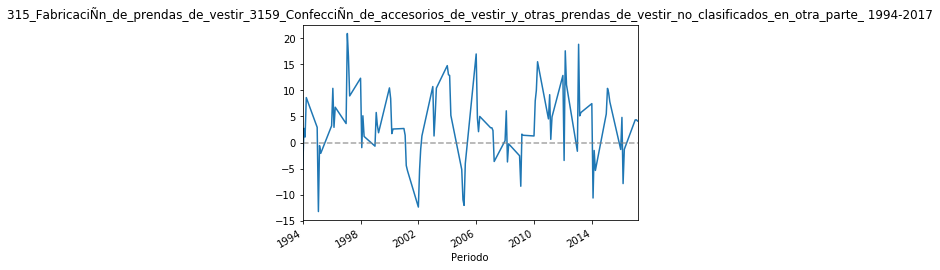

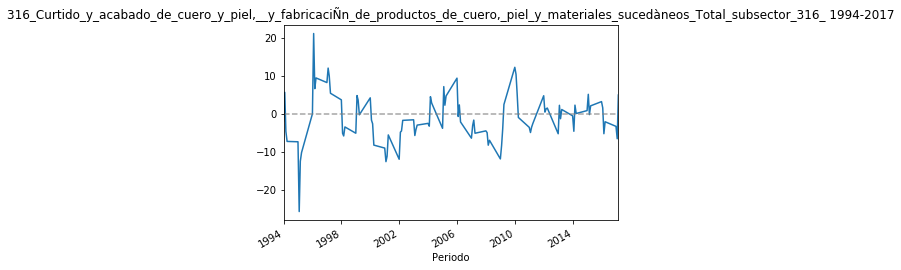

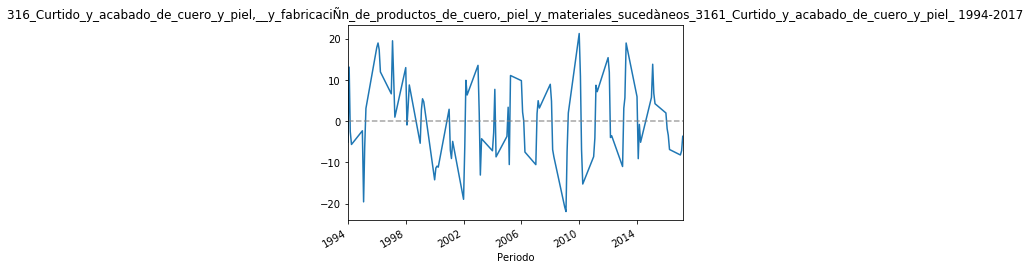

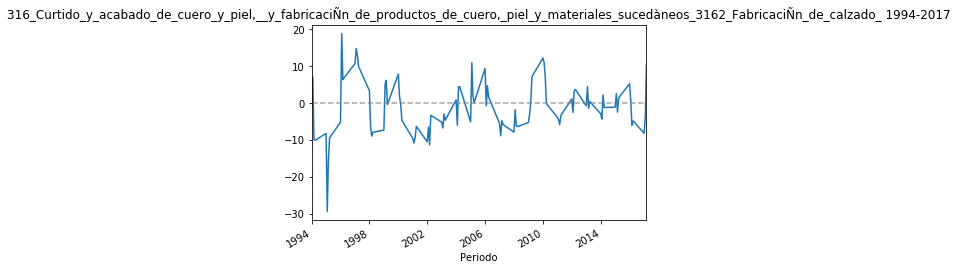

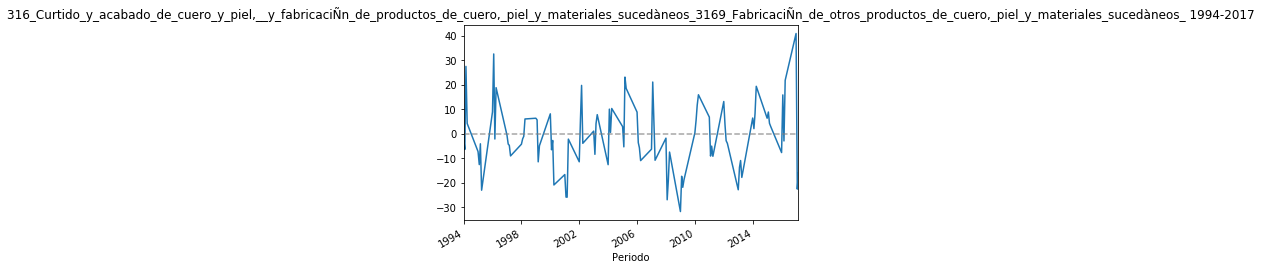

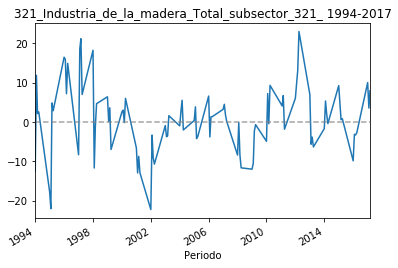

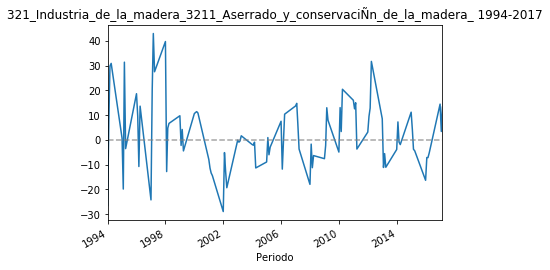

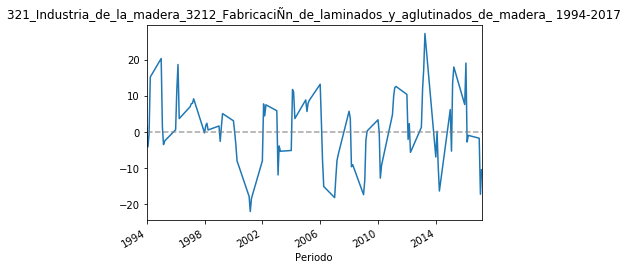

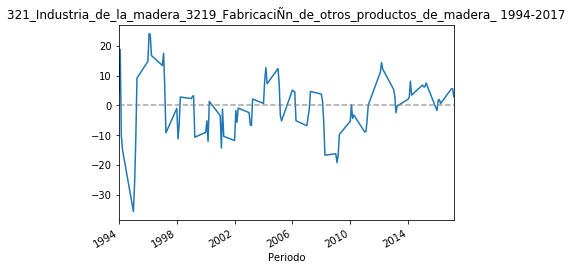

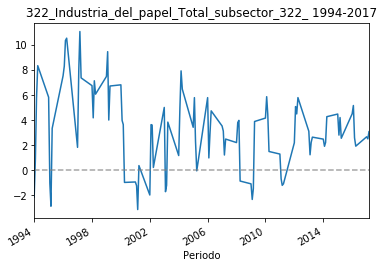

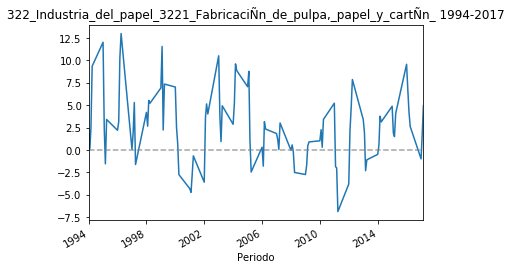

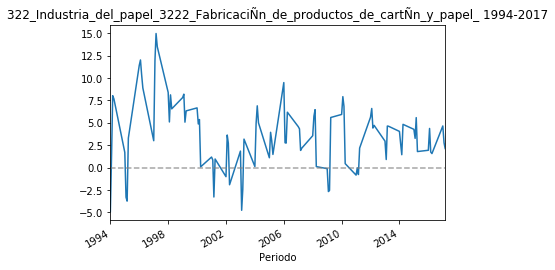

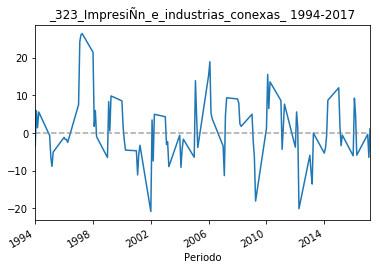

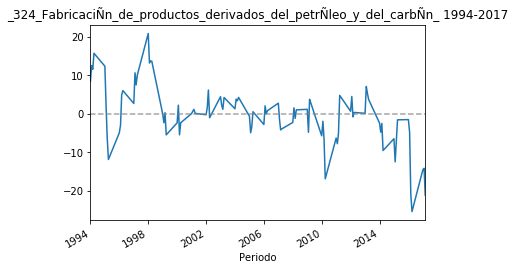

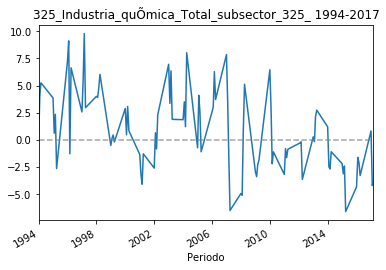

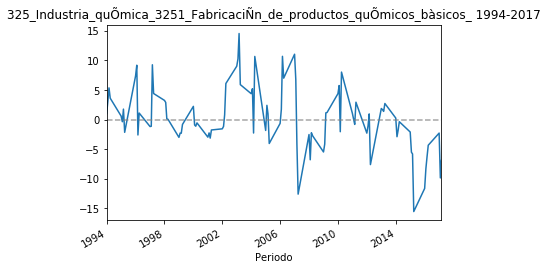

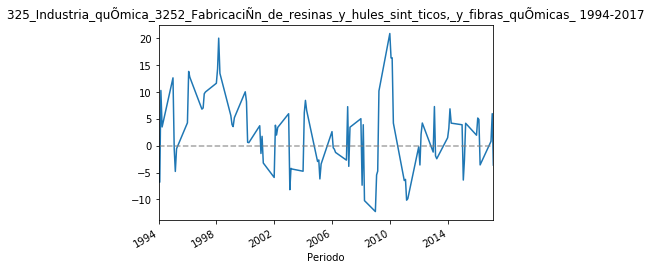

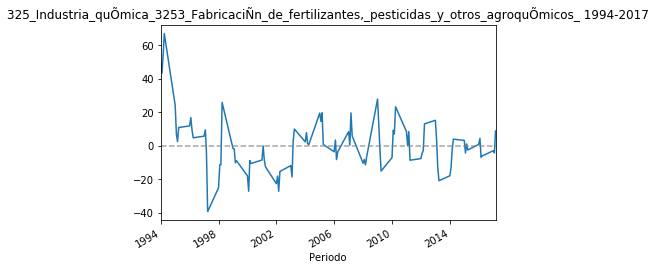

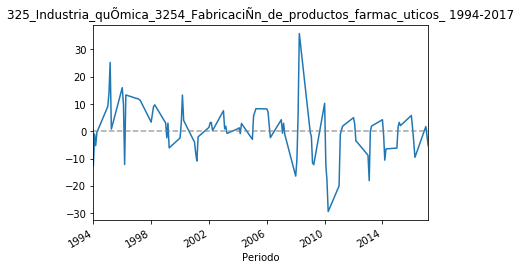

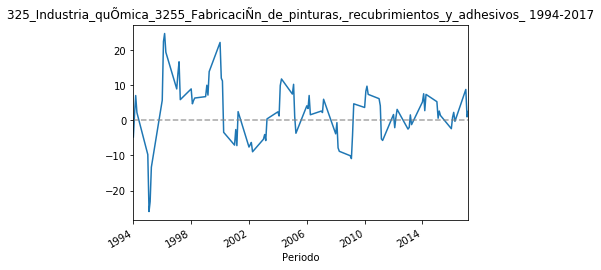

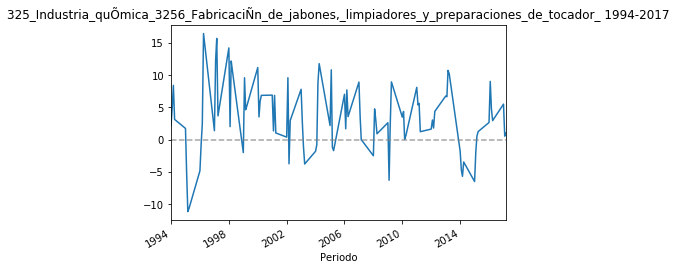

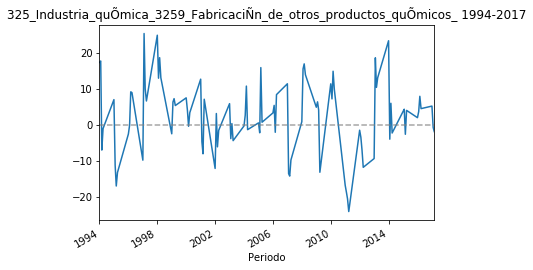

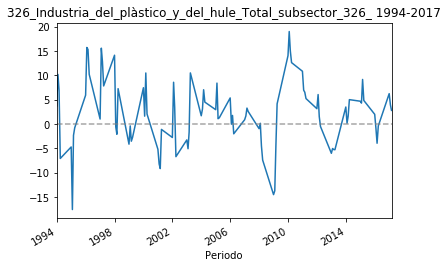

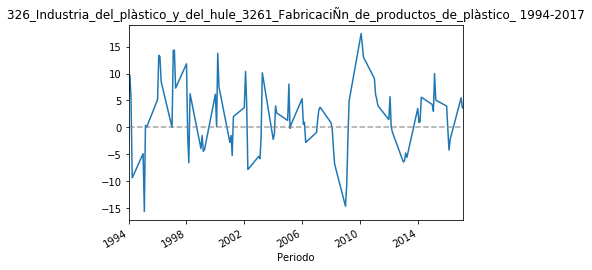

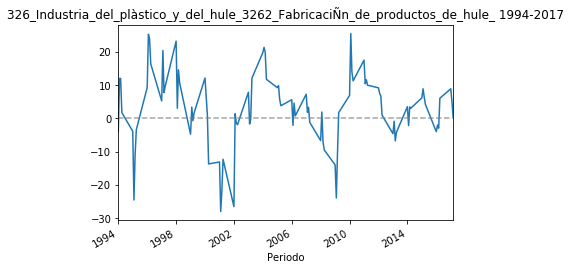

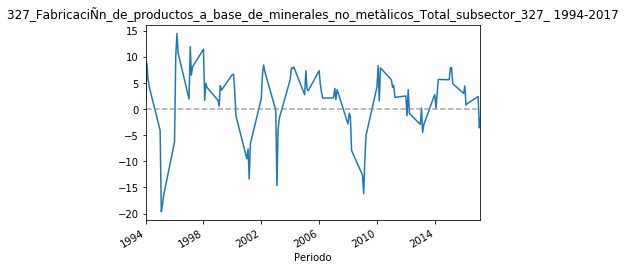

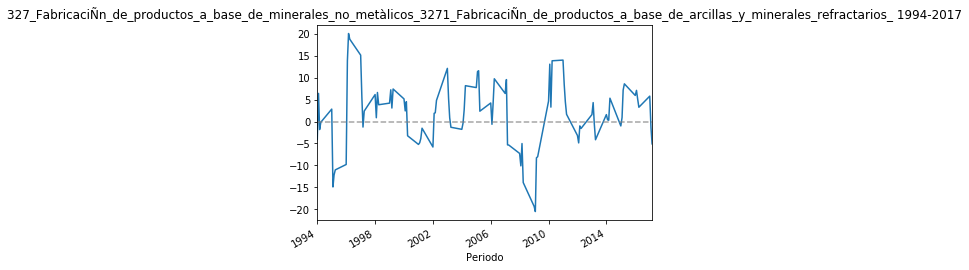

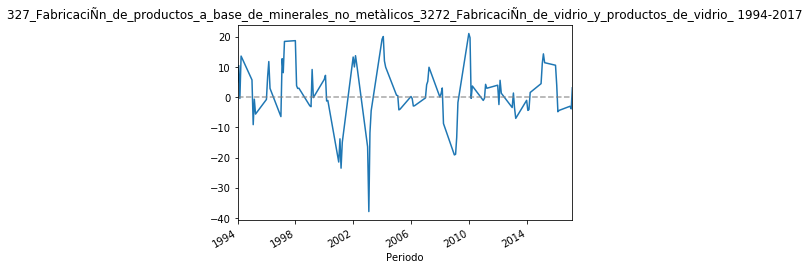

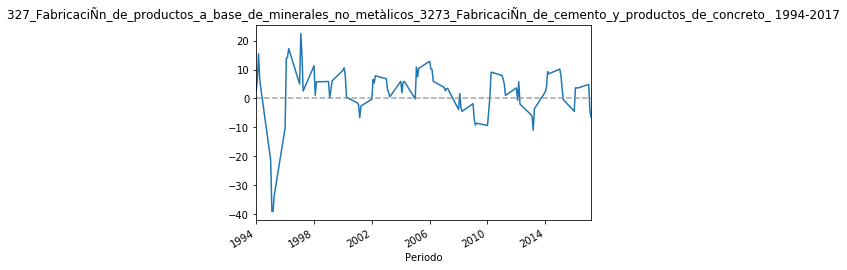

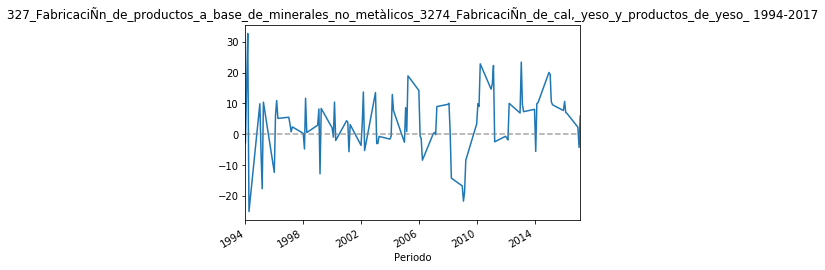

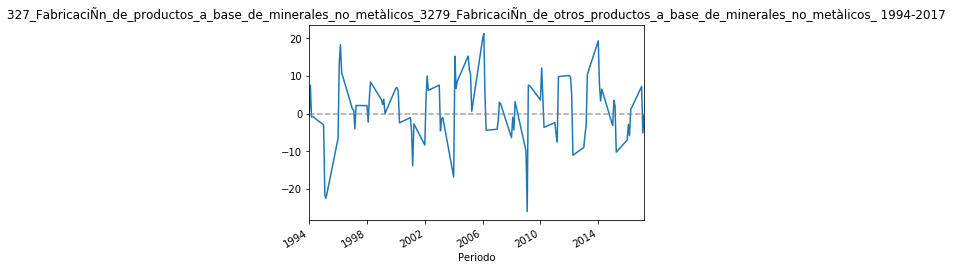

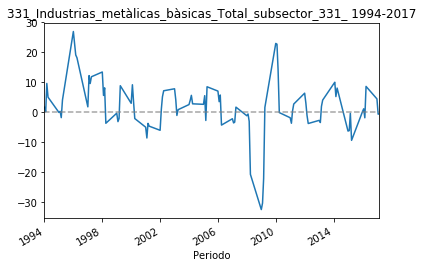

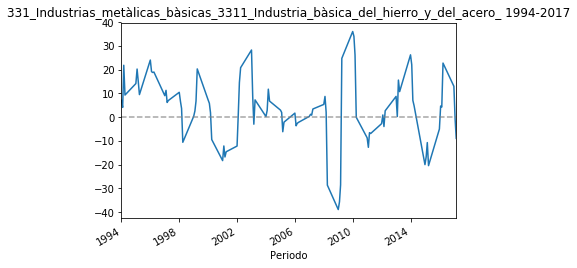

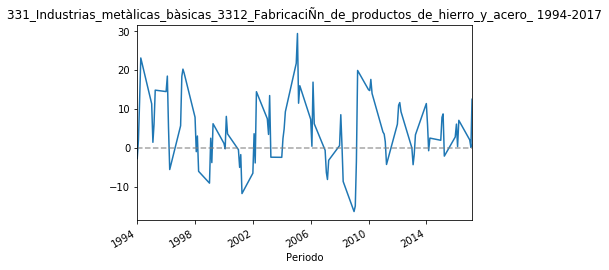

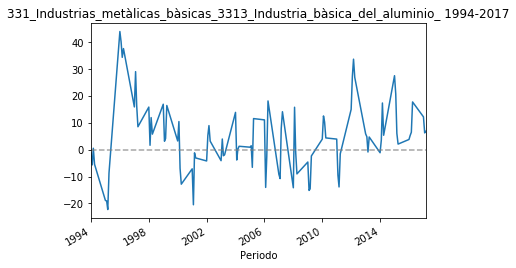

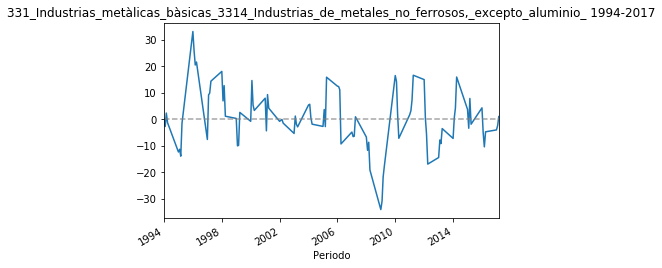

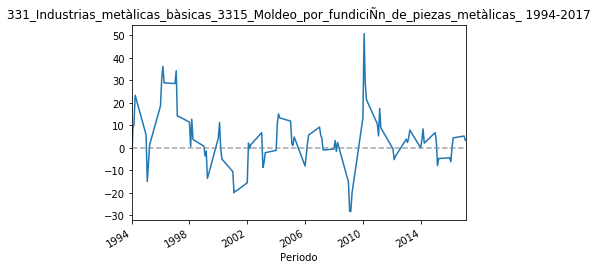

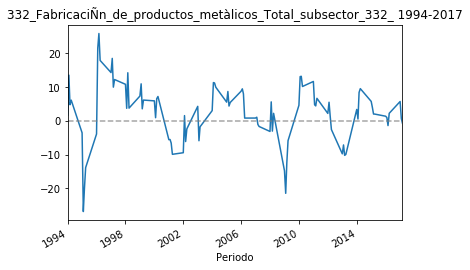

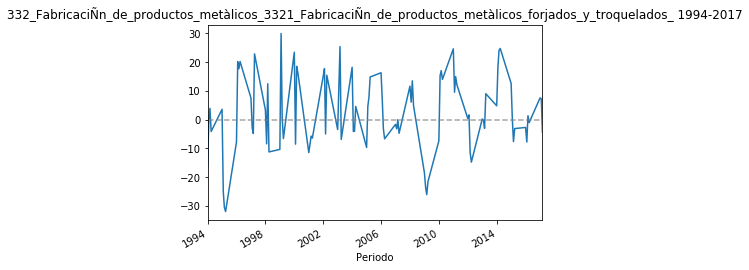

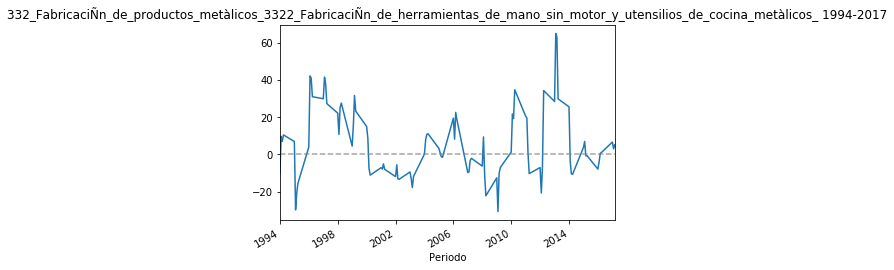

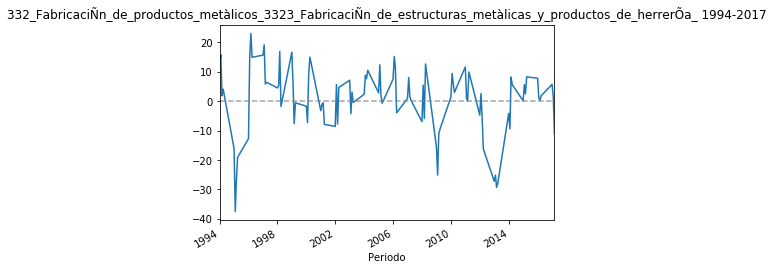

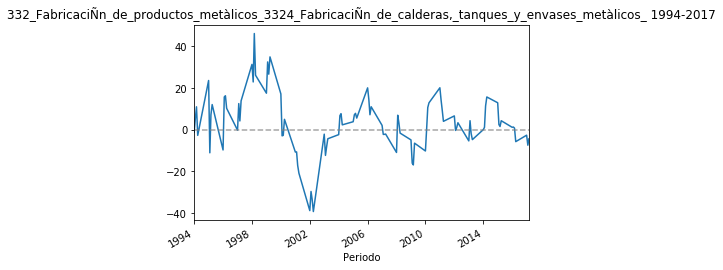

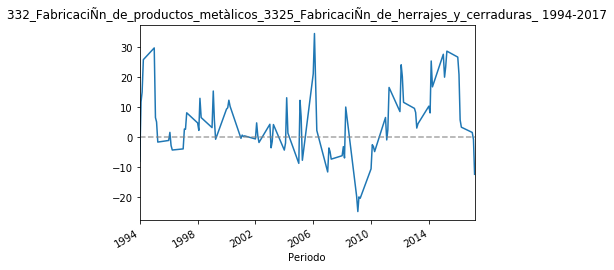

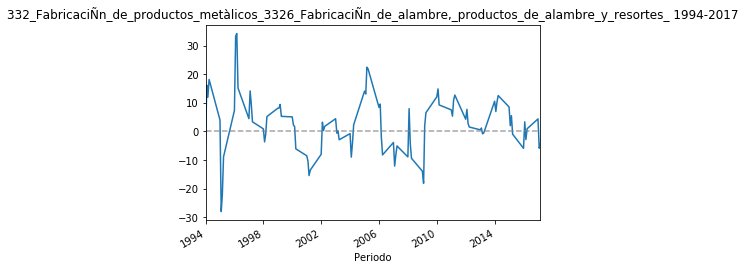

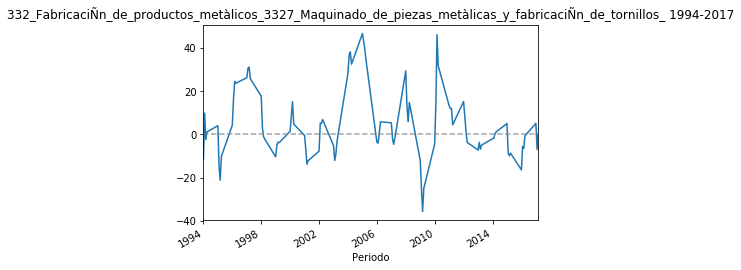

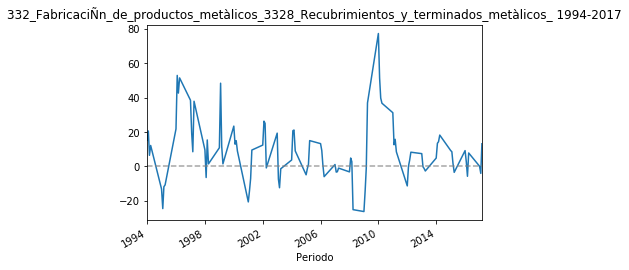

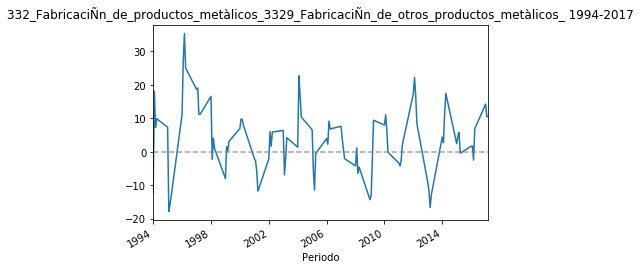

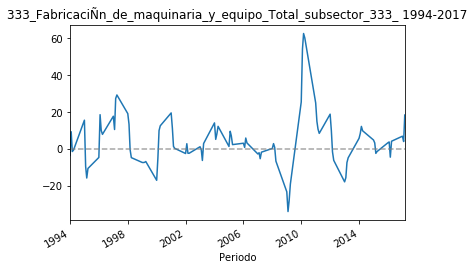

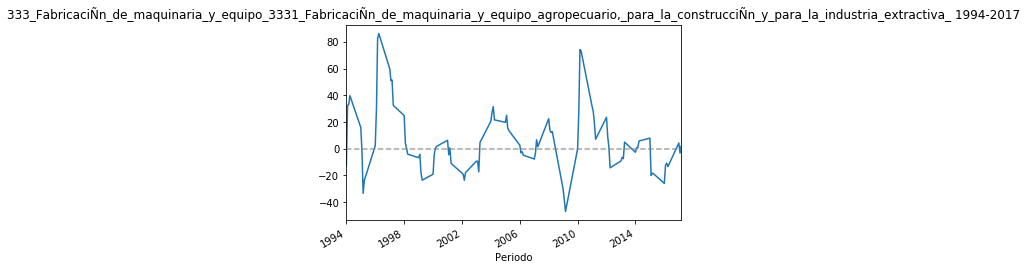

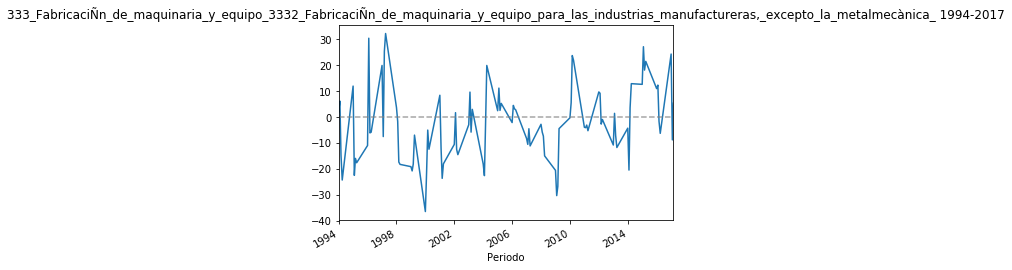

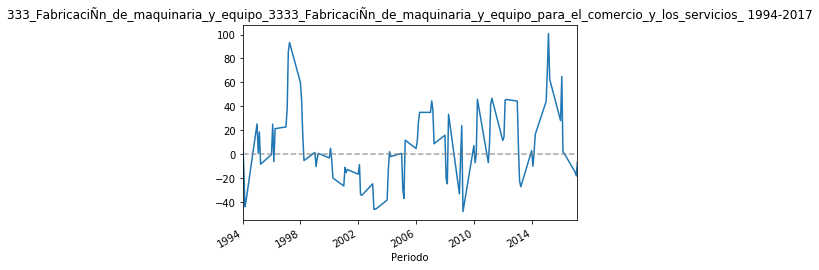

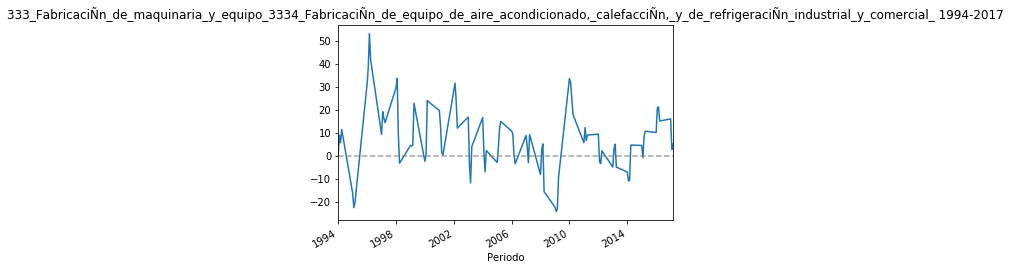

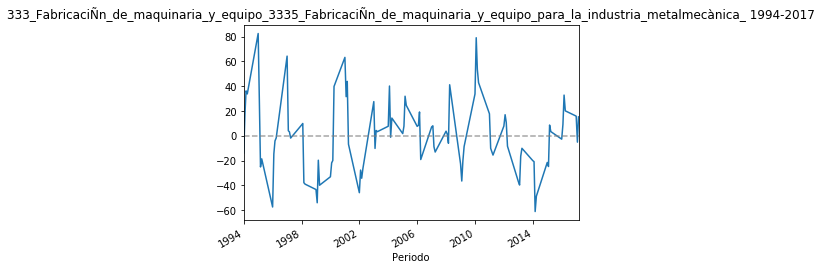

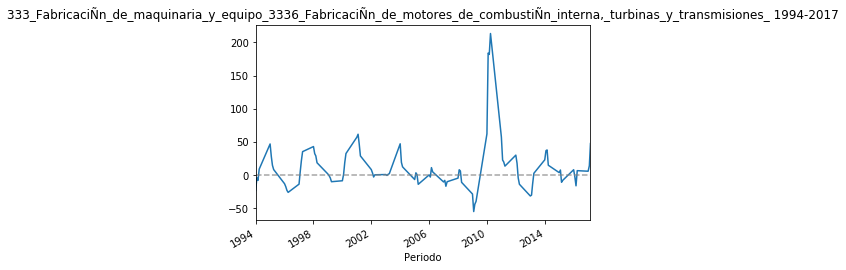

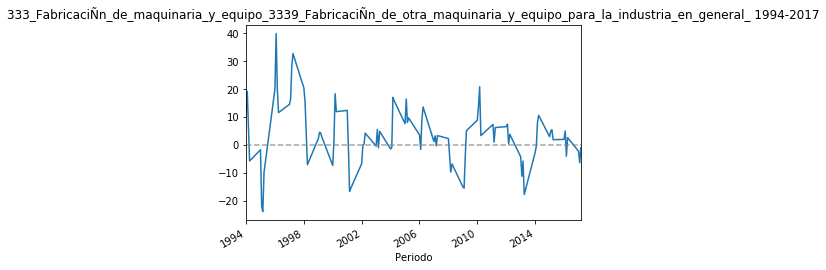

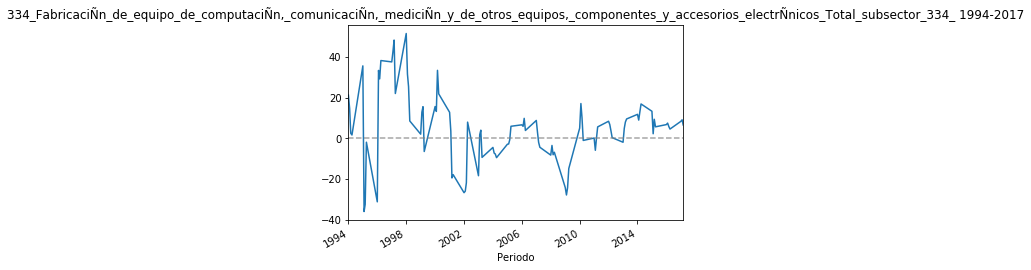

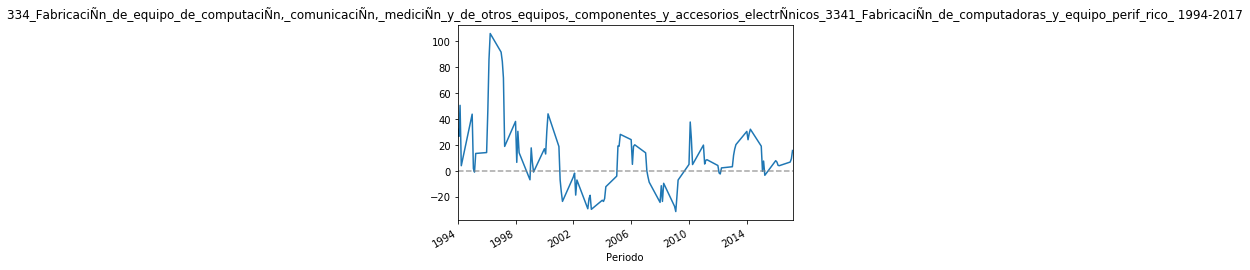

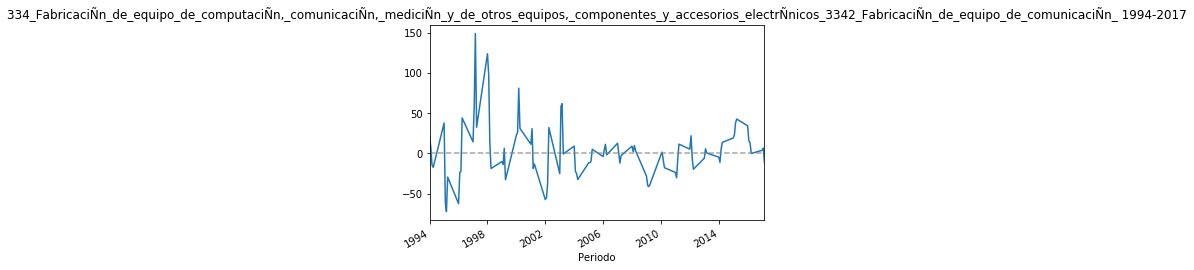

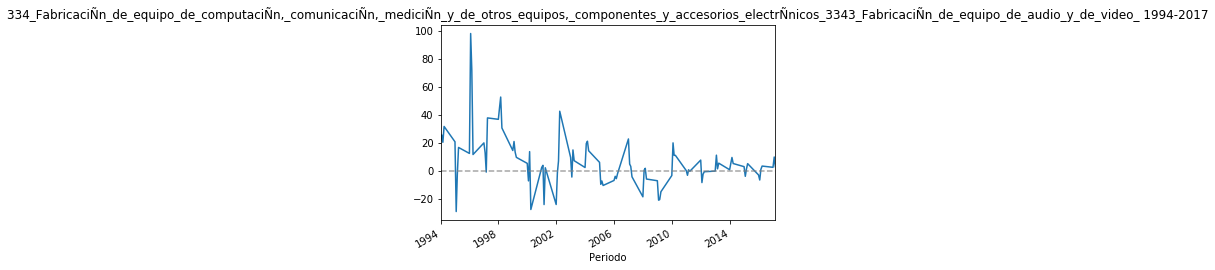

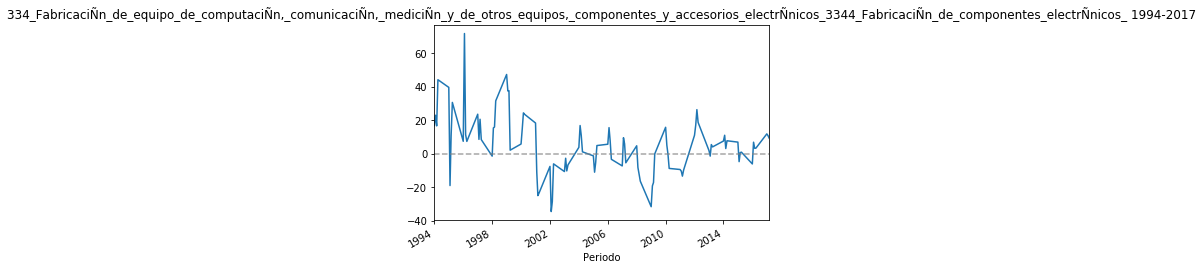

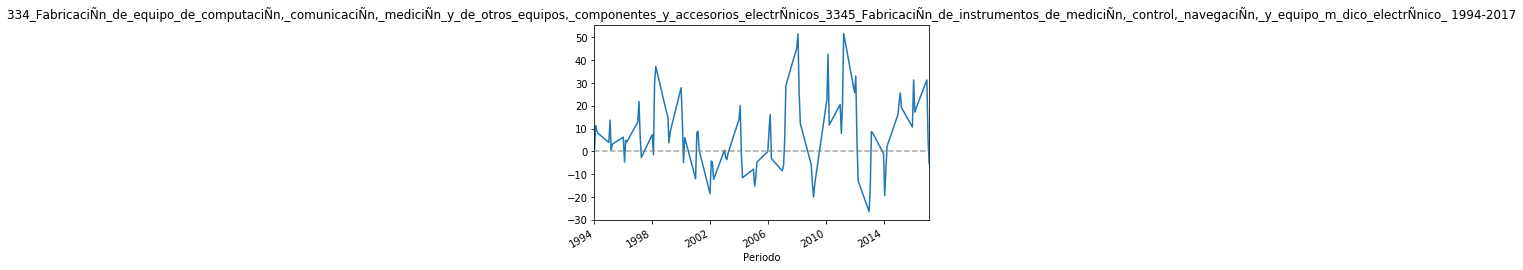

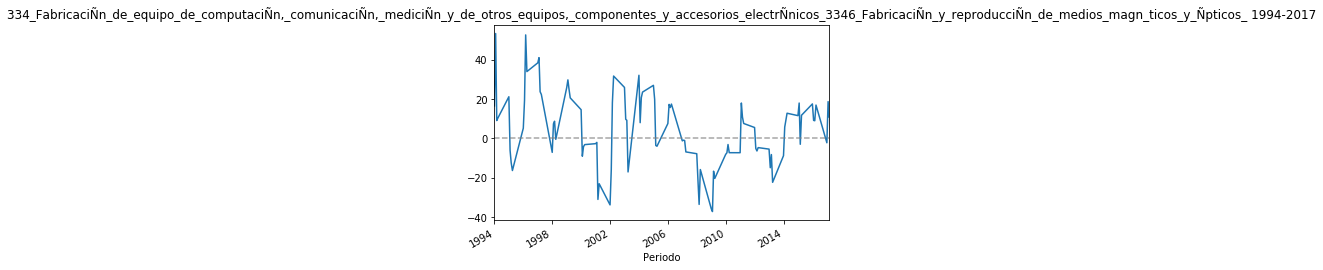

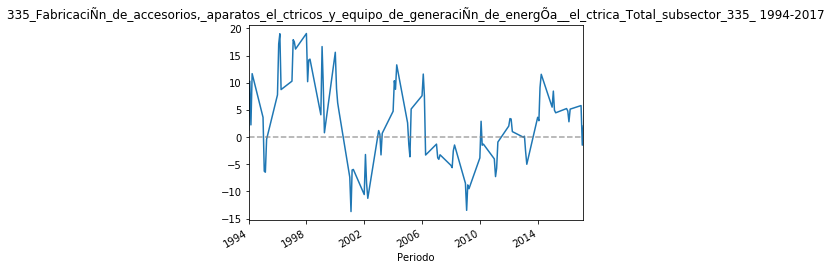

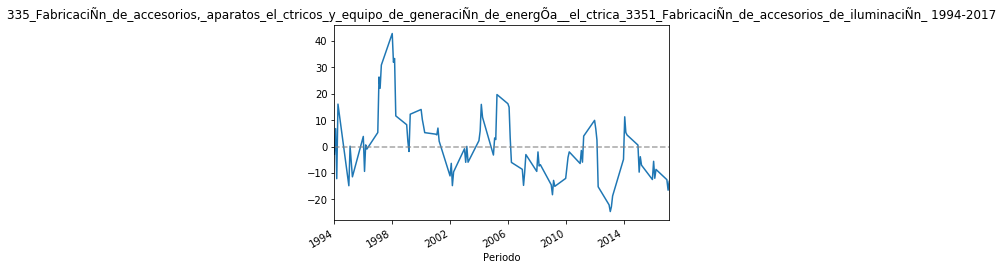

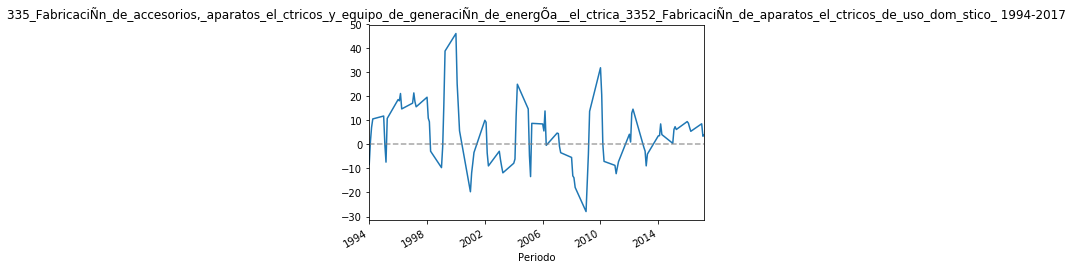

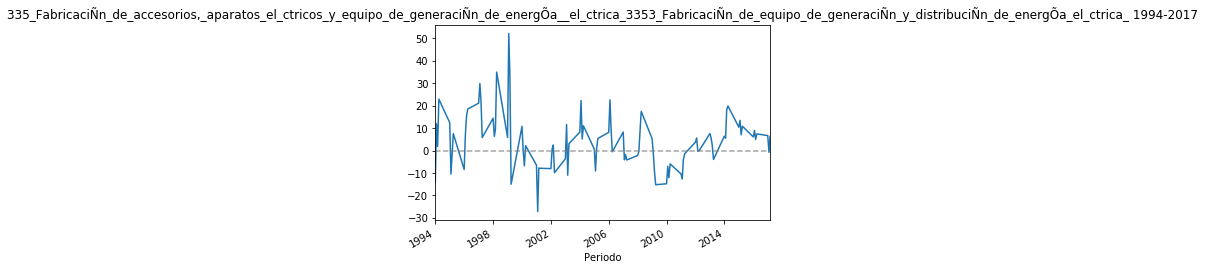

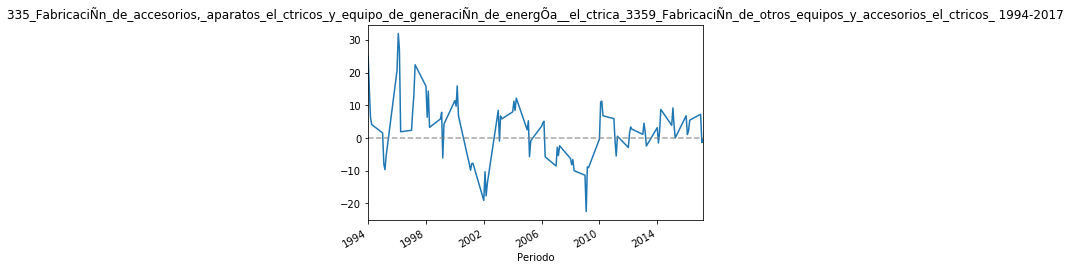

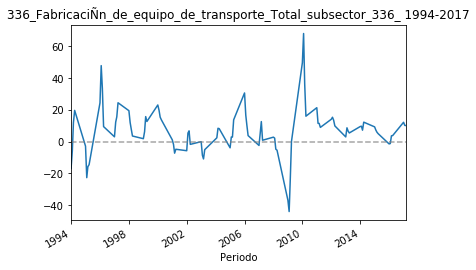

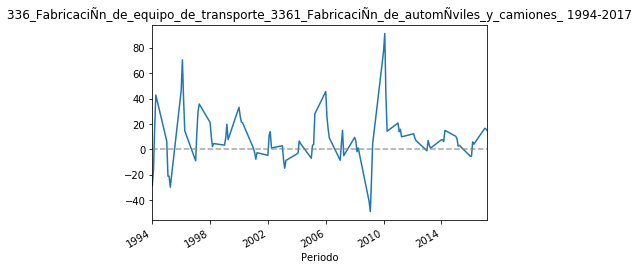

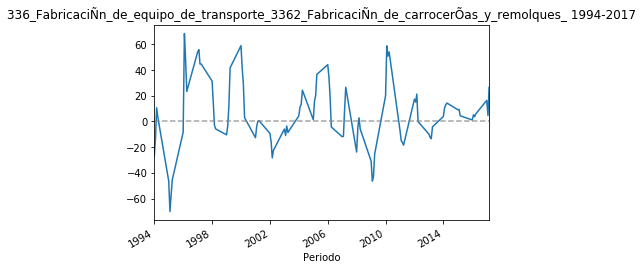

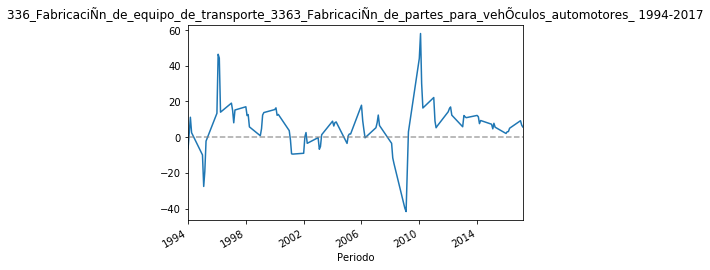

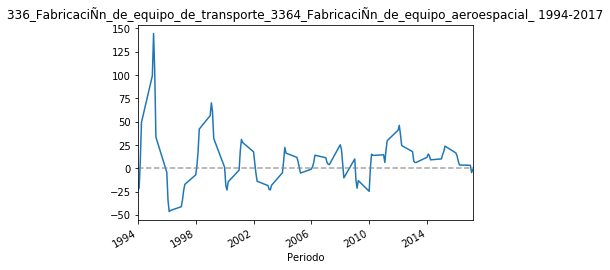

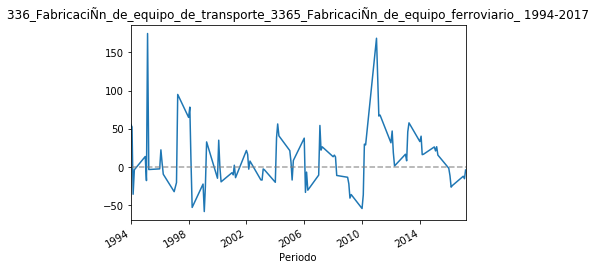

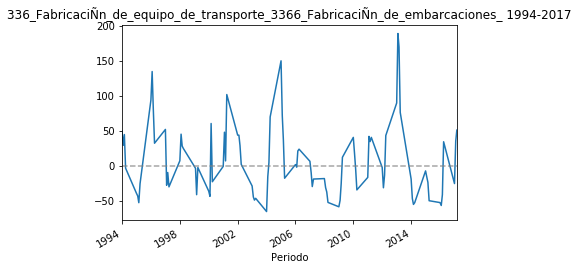

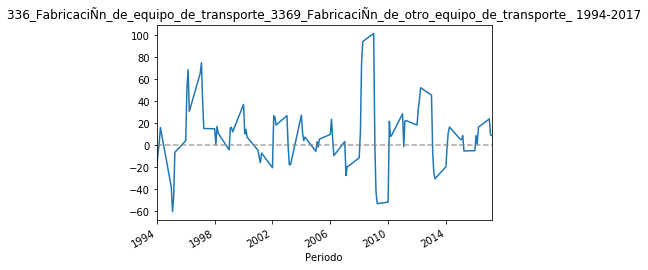

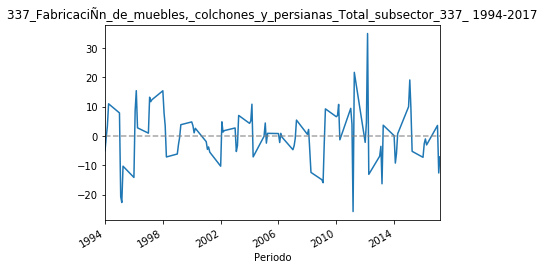

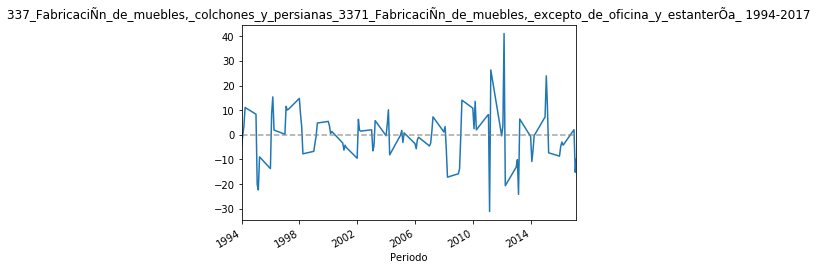

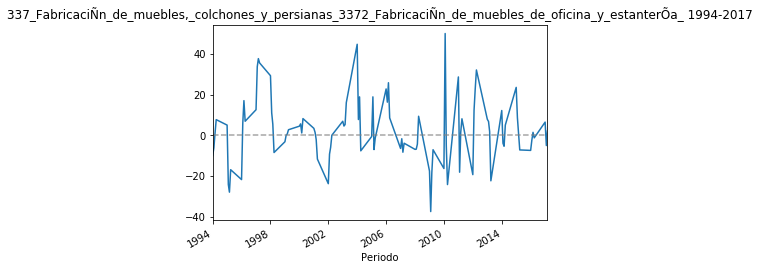

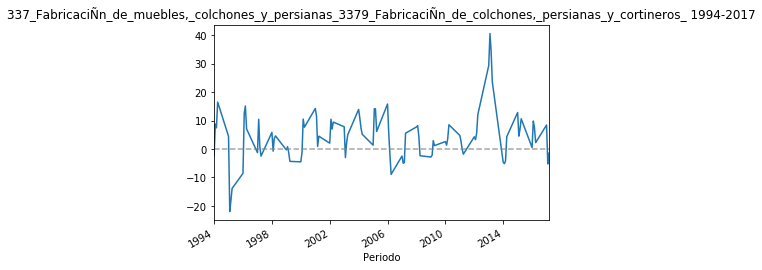

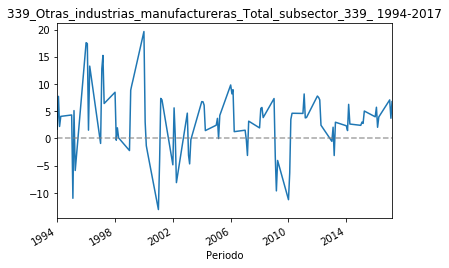

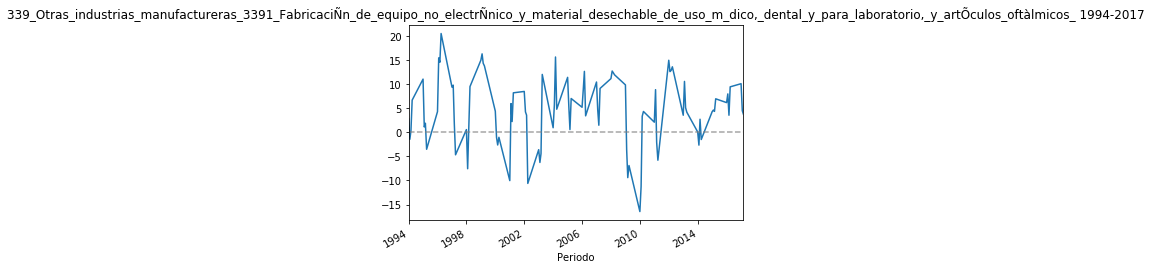

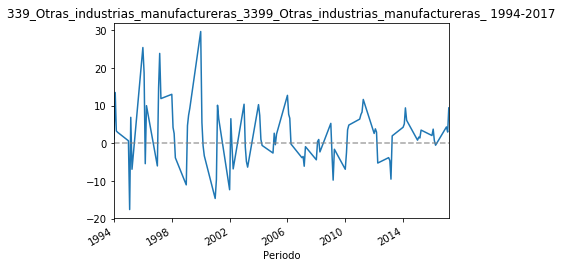

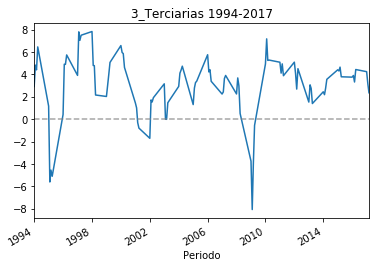

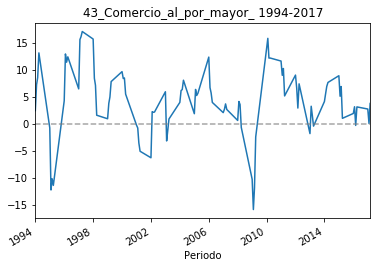

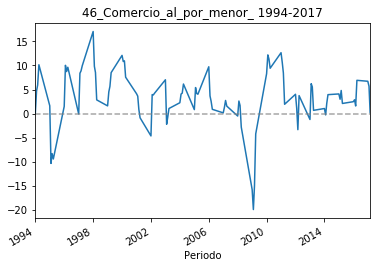

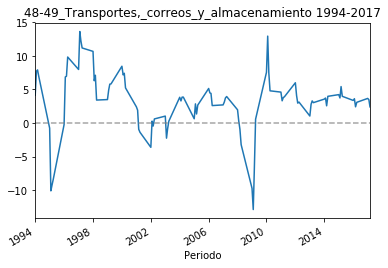

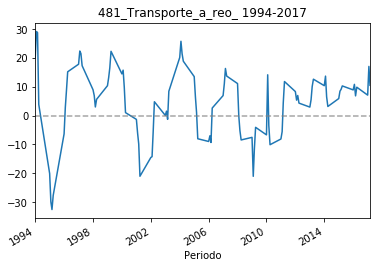

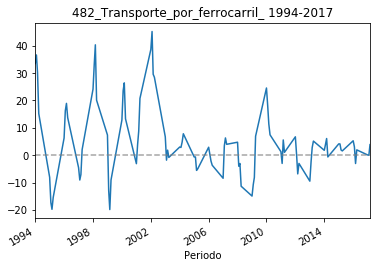

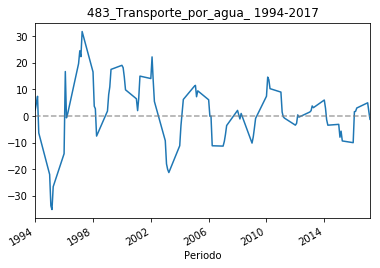

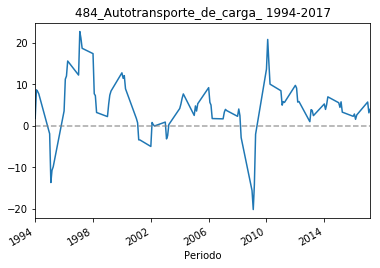

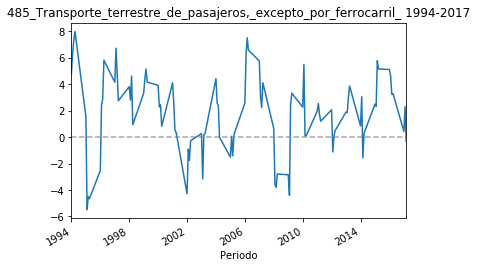

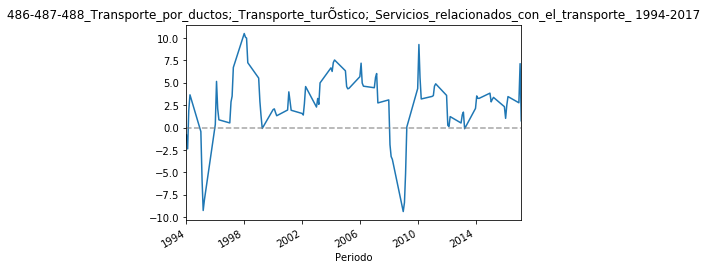

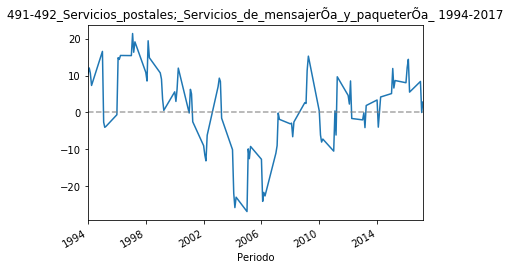

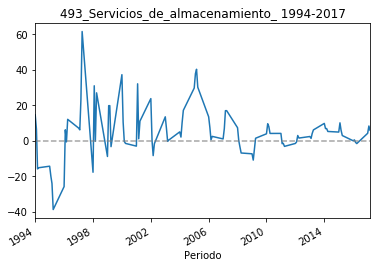

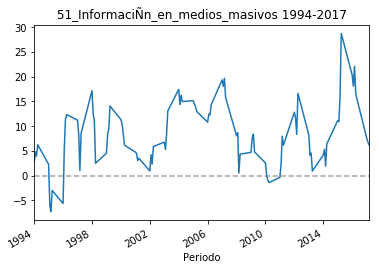

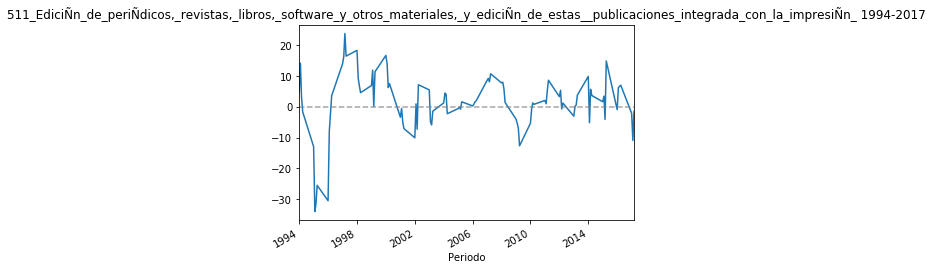

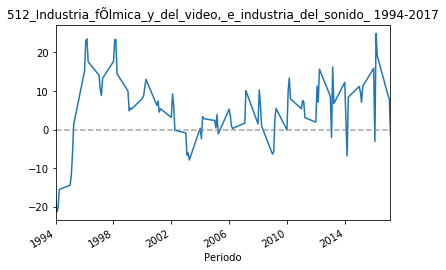

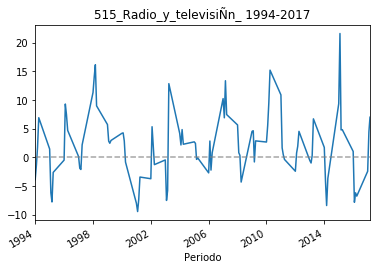

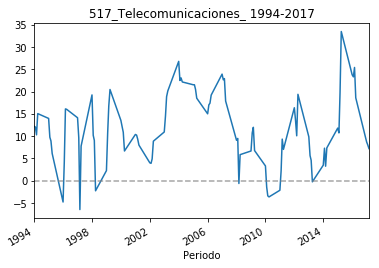

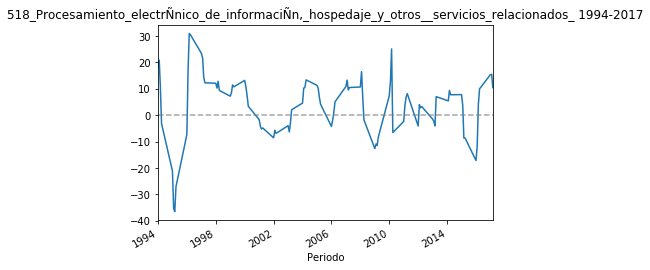

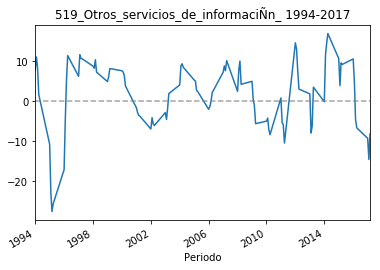

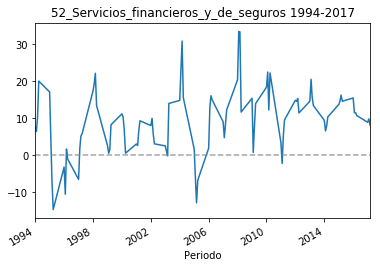

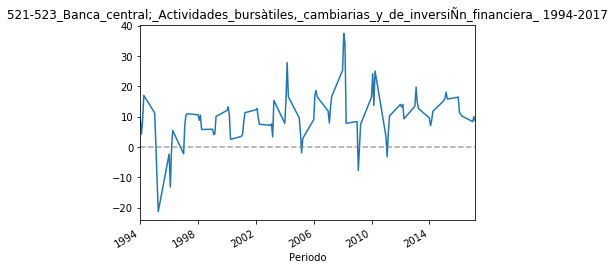

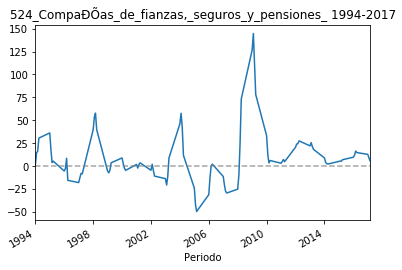

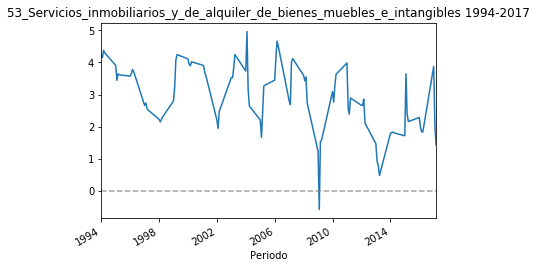

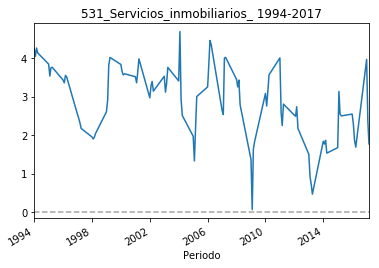

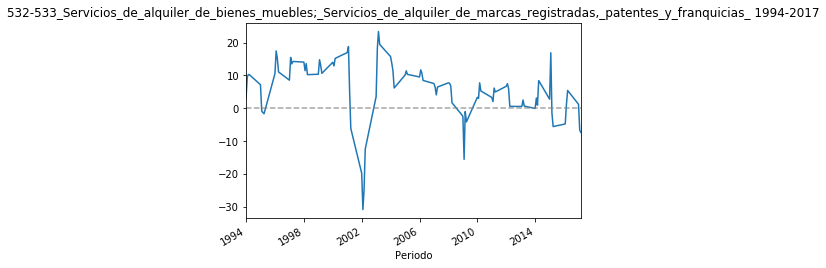

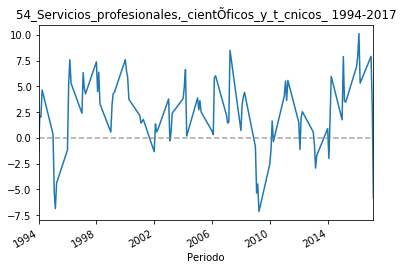

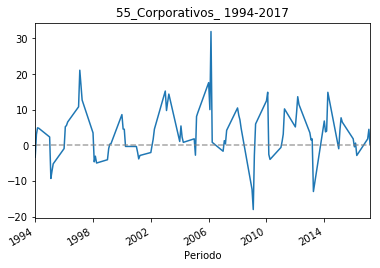

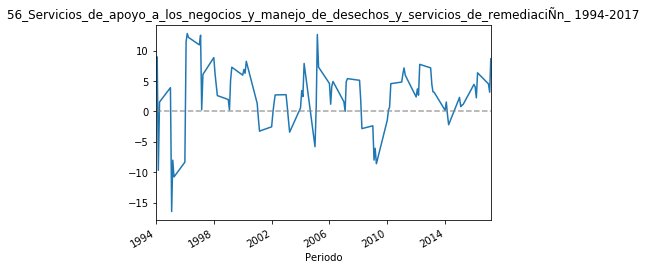

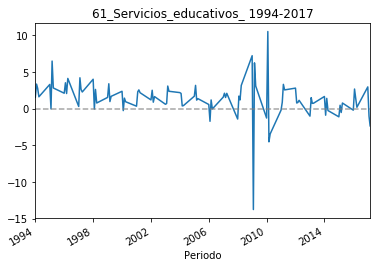

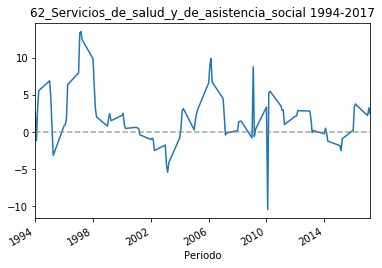

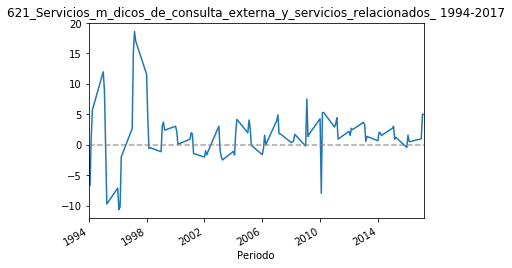

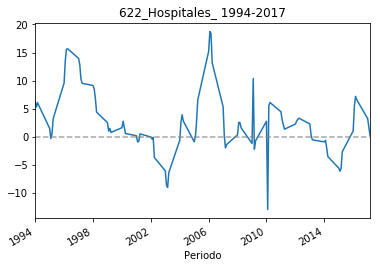

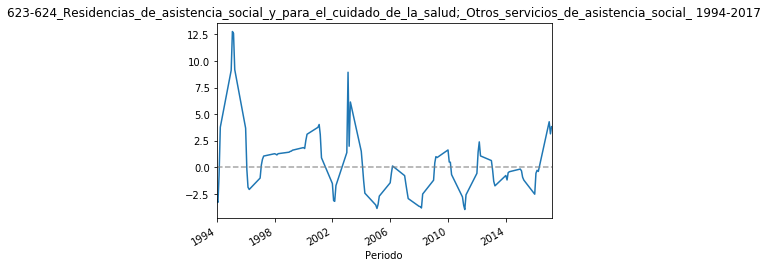

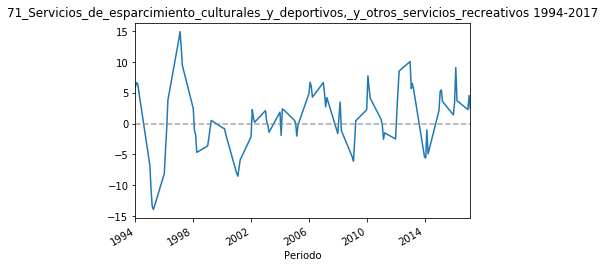

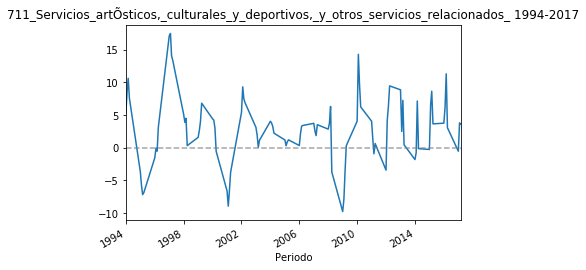

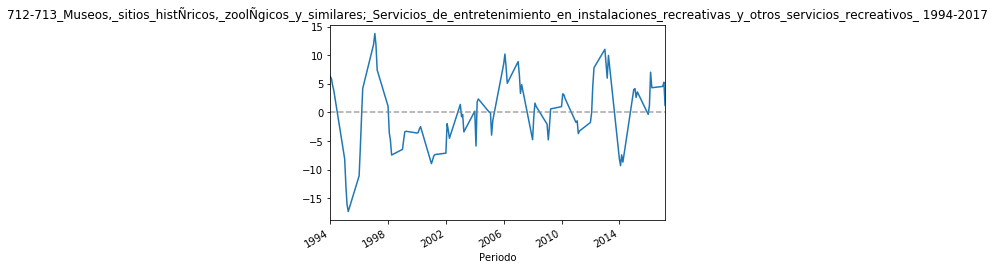

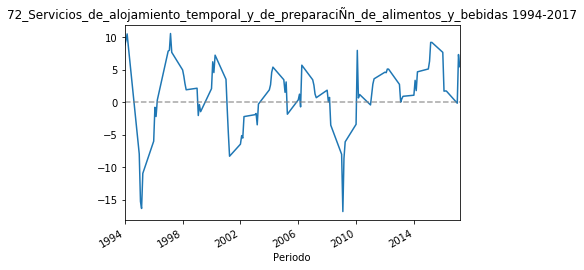

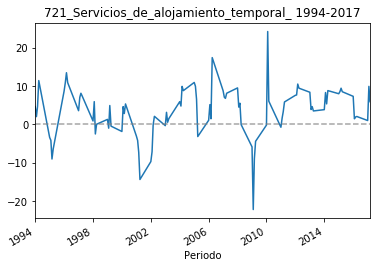

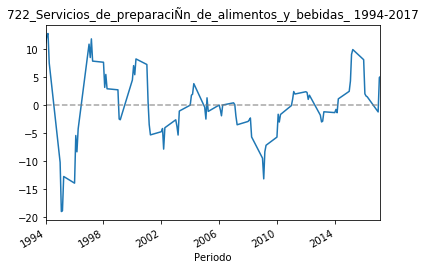

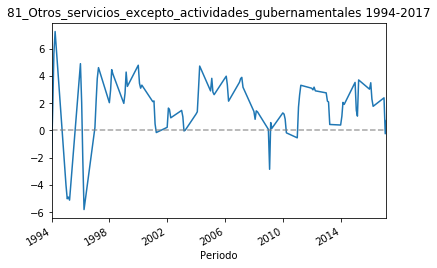

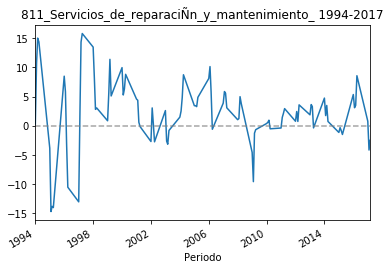

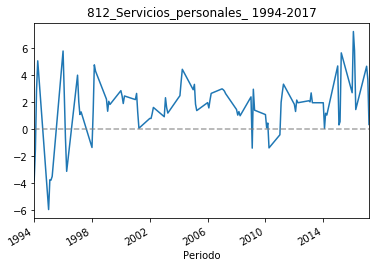

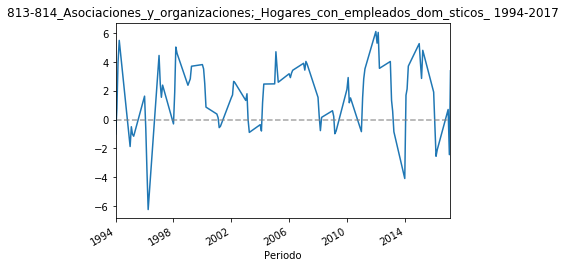

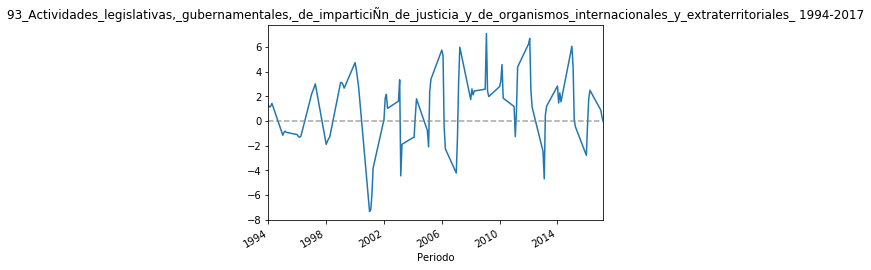

In [174]:
plt.figure() 

for col in cols_graficar:
    pib_ind_var_anual.plot(x='Periodo',y=col,title= str(col)+' 1994-2017',legend=False);
    plt.axhline(0,ls='dashed',alpha=0.7,color='gray');

### ¿Qué y cómo visualizar?

Una manera de priorizar nuestra visualización es viendo la importancia relativa de los 3 sectores de la economía en el PIB: primario, secundario y terciario. Así sabremos que mientras mayor proporción guarde alguno de los sectores mayor será su impacto en la economía en su conjunto

Primero, calculamos las proporciones de estos sectores

In [193]:
sectores = ['1_Primarias','2_Secundarias','3_Terciarias']
prop_sectores = []
for sector in sectores:  
    pib['prop'+'_'+str(sector)] = pib[sector]/pib['0_PIB']*100
    prop_sectores.append('prop'+'_'+str(sector))

In [196]:
pib_sectores = pib[prop_sectores].reset_index()
pib_sectores.head()

Index  prop_1_Primarias  prop_2_Secundarias  prop_3_Terciarias
0 1993-01-01          3.559056           36.539231          56.019232
1 1993-02-01          3.579696           35.322535          57.282186
2 1993-03-01          3.502402           36.563816          56.164853
3 1993-04-01          3.897934           36.532994          55.511276
4 1994-01-01          3.379287           36.875858          55.788224

Una manera de visualizar estos datos es mediante un gráfico de área

In [213]:
y = np.vstack([pib_sectores['prop_1_Primarias'],pib_sectores['prop_2_Secundarias'],pib_sectores['prop_3_Terciarias']])

In [215]:
x = list(pib_sectores['Index'])

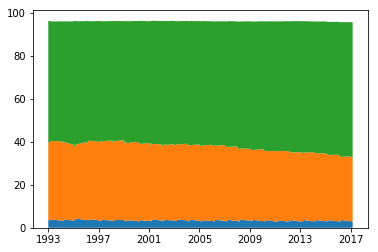

In [217]:
plt.stackplot(x,y);

No sé ve taaaaan bien como quisiéramos lo que probablemente se debe a que tenemos muchísimas observaciones. No obstante, podemos observar una tendencia de los servicios a adquirir mayor preponderancia, mientras que la producción industrial ha ido disminuyendo como proporción del PIB.

Otra manera de visualizar es mediante barras apiladas. Para que esta visualización sea más efectiva necesitamos reducir el número de observaciones a graficar

Primero calculamos crecimientos anuales del PIB

In [237]:
pib_sectores_anual = pib_sectores.groupby(pib_sectores['Index'].dt.year).mean()
pib_sectores_anual.head()

prop_1_Primarias  prop_2_Secundarias  prop_3_Terciarias
Index                                                         
1993           3.634772           36.239644          56.244387
1994           3.465913           36.460153          56.086808
1995           3.753585           34.659624          57.721006
1996           3.650662           36.300599          56.208310
1997           3.417863           36.661126          56.061015

Y elegimos una muestra cada 4 años para ver la tendencia de los sectores

In [240]:
muestra = np.arange(1993,2018,4)
muestra

array([1993, 1997, 2001, 2005, 2009, 2013, 2017])

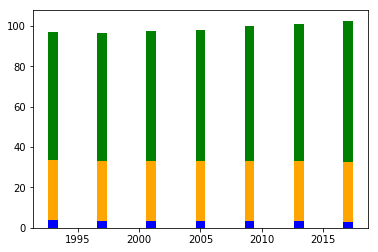

In [245]:
for anio in muestra: 
    plt.bar(anio,pib_sectores_anual['prop_1_Primarias'][anio],color='blue')
    plt.bar(anio,pib_sectores_anual['prop_2_Secundarias'][anio], bottom=pib_sectores_anual['prop_1_Primarias'][anio],color = 'orange')
    plt.bar(anio,pib_sectores_anual['prop_3_Terciarias'][anio], bottom=pib_sectores_anual['prop_1_Primarias'][anio]+pib_sectores_anual['prop_2_Secundarias'],color='green')    

Esta visualización es un poco más elegante que la gráfica de área, pero no convence del todo

A veces la visualización más efectiva del patrón corresponde simplemente a una tabla como la que se muestra debajo

In [256]:
round(pib_sectores_anual.loc[muestra],2)

prop_1_Primarias  prop_2_Secundarias  prop_3_Terciarias
Index                                                         
1993               3.63               36.24              56.24
1997               3.42               36.66              56.06
2001               3.36               35.67              57.15
2005               3.16               35.18              57.77
2009               3.34               33.06              59.58
2013               3.13               31.86              61.11
2017               2.99               29.86              62.72